In [1]:
import time
start0 = time.time()


# Workflow



# Music Genre Classification - Supervised Learning

**Author:** Johanna Tulisalmi-Eskola year 2021  
**Context:** This notebook is part of my thesis related to automatic music genre classification using supervised methods.  
**Content:** Creating and Comparing Music Genre Classification Models.  
**Performance Measure:** Classification Accuracy  
**Data:** GTZAN audio dataset  
**Features:** Several audio features extracted from GTZAN dataset  
**Methods:** Random Forest, KNN, Logistic Regression, and SVM  
**References:** Listed in the end of notebook  
***

### Introduction

This notebook experiments on music genre classifier model creation using machine learning. Music genre classifier models can be part of music information retrieval system. In this project music genre classification accuracy was selected as performance measure. Audio features extracted from GTZAN dataset were utilised for model training.  

Main steps are listed below. Some parts of these were taken manually.  

**1.** <a href = '#1.-Project-Preparations'>**Project Preparations:**</a> Creating project folder structure and initialising git and GitHub connection  
- 1.1 <a href = '#1.1-User-Input-for-Project-and-Experiment'>User Input for Project and Experiment</a>  
- 1.2 <a href = '#1.2-Jupyter-Magic,-Imports,-and-Panda-Settings'>Jupyter Magic, Imports, and Panda Settings</a>  
- 1.3 <a href = '#1.3-Creating-Project-Folders'>Creating Project Folders</a>  
- 1.4 <a href = '#1.4-Preparing-Manual-Tasks'>Preparing Manual Tasks</a>  
- 1.5 <a href = '#1.5-Outcome'>Outcome</a>    

**2.** <a href = '#2.-Data'>**Data:**</a> Getting data 
- 2.1 <a href = '#2.1-Downloading-Audio-Data'>Downloading Audio Data</a>   
- 2.2 <a href = '#2.2-Outcome'>Outcome</a>    

**3.** <a href = '#3.-Features'>**Features:**</a> Discovering and visualizing data to gain insights 
- 3.1 <a href = '#3.1-Calculating-or-Fetching-Feature-Sets'>Calculating or Fetching Feature Sets</a>  
- 3.2 <a href = '#3.2-First-Look-at-Feature-Data-Structure'>First Look at Feature Data Structure</a>    
- 3.3 <a href = '#3.3-Creating-Train-,-Validation-,-and-Test-Sets'>Creating Train-, Validation-, and Test Sets</a>    
- 3.4 <a href = '#3.4-Discovering-Feature-Data'>Discovering Feature Data</a>  
- 3.5 <a href = '#3.5-Outcome'>Outcome</a>  

**4.** <a href = '#4.-Data-Preparation:-Preparing-Data-for-Machine-Learning-Algorithms'>**Data Preparation:**</a> Preparing data for machine learning algorithms  
- 4.1 <a href = '#4.1-Transforming-Right-Skewed-Variables-with-ln(x)'>Transforming Right Skewed Variables with ln(x)</a>  
- 4.2 <a href = '#4.2-Scaling'>Scaling</a>  
- 4.3 <a href = '#4.3-Save-Prepared-Training,-Validation-and-Test-Sets-to-Folder-for-Processed-Data'>Save Prepared Training, Validation and Test Sets to Folder for Processed Data</a>
- 4.4 <a href = '#4.4-Quick-Check-on-Random-Forest-Model-Feature-Importances'>Quick Check on Random Forest Model Feature Importances</a>  
- 4.5 <a href = '#4.5-Outcome'>Outcome</a>  

**5.** <a href = '#5.-Modeling'>**Modeling:**</a> Building selected models, fine-tuning models, saving models  
- 5.1 <a href = '#5.1-Creating-Model-Baseline-Using-Several-Algorithms-with-Default-Hyperparameters'>Creating Model Baseline Using Several Algorithms with Default Hyperparameters</a>    
    - 5.1.2 <a href = '#5.1.2-Random-Forest-Classifier-Performance-and-Error-Checking'>Random Forest Classifier Performance and Error Checking</a>   
- 5.2 <a href = '#5.2-Tuning-and-Testing-Models'>Tuning and Testing Models</a> 
    - 5.2.1 <a href = '#5.2.1-Random-Forest-Model'>Random Forest Model</a>  
    - 5.2.2 <a href = '#5.2.2-K-Nearest-Neighbor-Model'>K Nearest Neighbor Model</a>  
    - 5.2.3 <a href = '#5.2.3-Logistic-Regression-Model'>Logistic Regression Model</a>  
    - 5.2.4 <a href = '#5.2.4-Support-Vector-Machine-Model'>Support Vector Machine Model</a>  
     
**6.** <a href = '#6.-Independencies'>**Independencies**</a>  
**7.** <a href = '#7.-References'>**References**</a>  


## 1. Project Preparations



## 1.1 User Input for Project and Experiment


<div class="alert alert-block alert-info">
    Before continuing, the requred information on project and experiment was filled into the cells below.   
</div>


In [2]:
# FILL IN input required for project setup
user_defined_project_parent_directory = 'C:/Users/jtuli/Documents/04 OPISKELU/YAMK' # BEFORE EXECUTING ADJUST THIS FOR THE PROJECT
user_defined_project_directory_name = 'thesis_ml' # BEFORE EXECUTING ADJUST THIS - set here name for project directory

# CHANGE this to True if you want to create folder structure for project
create_new_project_folders = False

In [3]:
# FILL iN an identifier for the experiment. This id is used in saving objects to file.
experiment_id = 'exp01_'
experiment_description = 'Conventional models using all 30 sec features'

Project needs clear folder structure and basic informative files. Git and GitHub connection needs to be initialised for enabling version control and sharing the files. These actions support model development and experiment  repeatability. Actions are partially done manually and partially by commands in the cells below.

<a href = '#Introduction'>Back to Introduction</a>


## 1.2 Jupyter Magic, Imports, and Panda Settings


#### Jupyter Magics

In [4]:
# Jyputer notebook specific setting for matplotlib handling
%matplotlib inline


#### Importing needed libraries


In [5]:
# All the import clauses used in this notebook are collected here

# system and filehandling
import os
import tarfile
import urllib.request
import pickle

# calculation and data handling
import math
from math import log
# import librosa
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# visualising
import seaborn as sns

# data preparation
from sklearn.preprocessing import StandardScaler

# model algorithms
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# model selection and evaluation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV

# metrics
import time
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


#### Some settings for pandas

In [6]:
# some settings for pandas for displaying output
pd.set_option('precision', 4)
pd.set_option('max_columns', 60)
pd.set_option('display.width', None)

<a href = '#Introduction'>Back to Introduction</a>


## 1.3 Creating Project Folders



#### Global variables: These Path 'Constants' Below are Used Across the Notebook.


In [7]:
# input needed project directory path settings
# setting the project related paths and other configurations
  
PROJECT_PARENT_DIR = user_defined_project_parent_directory
PROJECT_DIR_NAME = user_defined_project_directory_name

PROJECT_ROOT_DIR = os.path.join(PROJECT_PARENT_DIR, PROJECT_DIR_NAME)
# Where to save models
MODELS_PATH = os.path.join(PROJECT_ROOT_DIR, 'models')
PROCESSED_DATA_PATH = os.path.join(PROJECT_ROOT_DIR, 'data/processed')

In [8]:
# creating project folder structure
if create_new_project_folders:
    
    os.chdir(PROJECT_PARENT_DIR)
    os.mkdir(PROJECT_DIR_NAME)

    os.mkdir(os.path.join(PROJECT_ROOT_DIR,'data'))
    os.mkdir(os.path.join(PROJECT_ROOT_DIR,'data','external'))
    os.mkdir(os.path.join(PROJECT_ROOT_DIR,'data','interim'))
    os.mkdir(os.path.join(PROJECT_ROOT_DIR,'data','processed'))
    os.mkdir(os.path.join(PROJECT_ROOT_DIR,'data','raw'))

    os.mkdir(os.path.join(PROJECT_ROOT_DIR,'models'))

    os.mkdir(os.path.join(PROJECT_ROOT_DIR,'notebooks'))
    os.mkdir(os.path.join(PROJECT_ROOT_DIR,'notebooks','explore'))
    os.mkdir(os.path.join(PROJECT_ROOT_DIR,'notebooks','other'))
    os.mkdir(os.path.join(PROJECT_ROOT_DIR,'notebooks','poc'))

    os.mkdir(os.path.join(PROJECT_ROOT_DIR,'src'))
    os.mkdir(os.path.join(PROJECT_ROOT_DIR,'src','data'))
    os.mkdir(os.path.join(PROJECT_ROOT_DIR,'src','features'))
    os.mkdir(os.path.join(PROJECT_ROOT_DIR,'src','model'))
    
    print('Folder structure for project:', PROJECT_DIR_NAME + ' was created under ', PROJECT_PARENT_DIR)
    
else:
    print('Folder creation skipped.')

Folder creation skipped.


<a href = '#Introduction'>Back to Introduction</a>


## 1.4 Preparing Manual Tasks

Informative files (readme.md and requirements.txt) were manually added under the project folder.  
In addition Git and GitHub connections were manually established.


## 1.5 Outcome

If new folders were requested to create abowe, the following folder structure was established:
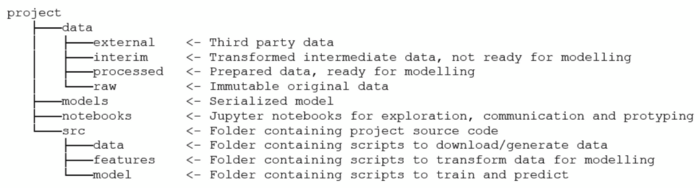
<br>Figure source: https://towardsdatascience.com/structuring-machine-learning-projects-be473775a1b6  
<br>
After malual actions version control using git is initialised and connection to GitHub is working and project files can be shared on GitHub.  

The project preparations are ready and working on data, features, and modelling can start.  

Experiment has got an unique identifier from user. That experiment id is used in naming the objects that are saved to file.

<a href = '#Introduction'>Back to Introduction</a>


## 2. Data


To train models data is needed. For this project GTZAN audio dataset was decided to be used. It is available on internet. Next that dataset needs to be downloaded into the data/raw -folder of this project.
<br><br>
GTZAN was introdused by Tzanetakis in 2001. Information on GTZAN is available on http://martyas.info/downloads/datasets.html (1) GTZAN dataset contains 1000 .wav 30 second long audio files. These audio samples represent ten genres; 100 samples per music genre.

<a href = '#Introduction'>Back to Introduction</a>


## 2.1 Downloading Audio Data



#### Downloading


In [9]:
# Downloading audio data set GTZAN
# GTZAN data set was downloaded from opihi.cs.uvic.ca/sound/genres.tar.gz to local laptop and extracted.
# size of genres.tar.gz file is 1.1 GB 

def fetch_gtzan_dataset(source_url, destination_path):
    """Downloading genres.tar.gz file and extracting it."""
    
    if not os.path.isdir(destination_path):
        os.makedirs(destination_path)
    tgz_path = os.path.join(destination_path, "genres.tar.gz")
   
    urllib.request.urlretrieve(source_url, tgz_path)
    gtzan_tgz = tarfile.open(tgz_path)
    gtzan_tgz.extractall(path=destination_path)
    gtzan_tgz.close()

source = "http://opihi.cs.uvic.ca/sound/genres.tar.gz"
destination = os.path.join(PROJECT_ROOT_DIR,"data", "raw")

get_data = False # if you want to fetch GTZAN data set from internet then set get_data to True

if get_data:
    fetch_gtzan_dataset(source,destination)
else:
    print('Fetching GTZAN dataset skipped.')    

Fetching GTZAN dataset skipped.



## 2.2 Outcome

GTZAN audio dataset was downloaded from internet into local data/raw -folder and extracted.  

Note: Eventhough in this notebook a ready made feature set is used, these music sample files were required for a related study providing a human baseline for this music genre classifier experiment.

<a href = '#Introduction'>Back to Introduction</a>


## 3. Features


Raw audio samples as such are not suitable as input for machine learning algorithms, thus one needs to extract features from audio samples. After that data is explored and visualized to gain insights. Data set is split into training, validation, and test sets. Finally the feature data is prepared for machine learning algorithms.

- looking at the data structure
- feature distributions, how do those look like?
- are all values included?
- which features matter the most?
- engineering new meaningful and descriptive features? (out of the scope of this notebook and project)

<a href = '#Introduction'>Back to Introduction</a>


## 3.1 Calculating or Fetching Feature Sets

Options considered were:

1. Extracting/calculating features from audio samples using for example the librosa library.
2. Getting ready calculated feature data set from internet.

Since gtzan audio feature data in csv file was readily available at kaggle.com https://www.kaggle.com/andradaolteanu/gtzan-dataset-music-genre-classification (2), that was desided to be used in this project.  

The feature data was manually downloaded and extracted from download url: https://www.kaggle.com/andradaolteanu/gtzan-dataset-music-genre-classification/download (2). Features include 20 first MFCCs, and many other frequently used audio content features extracted from 30 second audio samples.  

#### Outcome

Feature data sets and spectrogram images stored under project data-folders.

<a href = '#Introduction'>Back to Introduction</a>


## 3.2 First Look at Feature Data Structure


In [10]:
# loading feature csv file into pandas dataframe
csv_source_path = os.path.join(PROJECT_ROOT_DIR,'data/raw/features_30_sec.csv')
gtzan_features_30_sec_df = pd.read_csv(csv_source_path, sep=',')

In [11]:
# listing information on the feature data. This shows what features are included in the data.
gtzan_features_30_sec_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 60 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   filename                 1000 non-null   object 
 1   length                   1000 non-null   int64  
 2   chroma_stft_mean         1000 non-null   float64
 3   chroma_stft_var          1000 non-null   float64
 4   rms_mean                 1000 non-null   float64
 5   rms_var                  1000 non-null   float64
 6   spectral_centroid_mean   1000 non-null   float64
 7   spectral_centroid_var    1000 non-null   float64
 8   spectral_bandwidth_mean  1000 non-null   float64
 9   spectral_bandwidth_var   1000 non-null   float64
 10  rolloff_mean             1000 non-null   float64
 11  rolloff_var              1000 non-null   float64
 12  zero_crossing_rate_mean  1000 non-null   float64
 13  zero_crossing_rate_var   1000 non-null   float64
 14  harmony_mean             

<div class="alert alert-block alert-info">
    The output of the above information on the feature data shows all the features have all the values included. (1000 non-null values for all features; good. In addlidion all feature values are numeric, only filename, and target classes i.e. the labels, are text. So far the feature data is in suitable for machine learning.) Filename and length will not be used in model training.
    <br><br>
    The size of feature dataset is 1000 samples. That could have been bigger, but modeling can work with this set size too. Size sets some guidance to the training and test set split sizes.
</div>

In [12]:
# listing five first samples
gtzan_features_30_sec_df.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,zero_crossing_rate_mean,zero_crossing_rate_var,harmony_mean,harmony_var,perceptr_mean,perceptr_var,tempo,mfcc1_mean,mfcc1_var,mfcc2_mean,mfcc2_var,mfcc3_mean,mfcc3_var,mfcc4_mean,mfcc4_var,mfcc5_mean,mfcc5_var,mfcc6_mean,mfcc6_var,mfcc7_mean,mfcc7_var,mfcc8_mean,mfcc8_var,mfcc9_mean,mfcc9_var,mfcc10_mean,mfcc10_var,mfcc11_mean,mfcc11_var,mfcc12_mean,mfcc12_var,mfcc13_mean,mfcc13_var,mfcc14_mean,mfcc14_var,mfcc15_mean,mfcc15_var,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.3501,0.0888,0.1302,0.0028,1784.1658,129774.0645,2002.4491,85882.7613,3805.8396,9.0151e+05,0.0830,0.0008,-4.5297e-05,0.0082,7.7832e-06,0.0057,123.0469,-113.5706,2564.2075,121.5718,295.9138,-19.1681,235.5744,42.3664,151.1069,-6.3647,167.9348,18.6235,89.1808,-13.7049,67.6605,15.3432,68.9326,-12.2741,82.2042,10.9766,63.3863,-8.3266,61.7731,8.8038,51.2441,-3.6723,41.2174,5.7480,40.5545,-5.1629,49.7754,0.7527,52.4209,-1.6902,36.5241,-0.4090,41.5971,-2.3035,55.0629,1.2213,46.9360,blues
1,blues.00001.wav,661794,0.3409,0.0950,0.0959,0.0024,1530.1767,375850.0736,2039.0365,213843.7555,3550.5221,2.9779e+06,0.0560,0.0014,1.3958e-04,0.0051,-1.7761e-04,0.0031,67.9996,-207.5017,7764.5552,123.9913,560.2599,8.9551,572.8109,35.8776,264.5061,2.9073,279.9329,21.5105,156.4771,-8.5604,200.8492,23.3707,142.5560,-10.0997,166.1085,11.9005,104.3586,-5.5556,105.1736,5.3763,96.1972,-2.2318,64.9143,4.2201,73.1525,-6.0121,52.4221,0.9280,55.3564,-0.7311,60.3145,0.2951,48.1206,-0.2835,51.1062,0.5312,45.7863,blues
2,blues.00002.wav,661794,0.3636,0.0853,0.1756,0.0027,1552.8119,156467.6434,1747.7023,76254.1923,3042.2602,7.8403e+05,0.0763,0.0010,2.1056e-06,0.0163,-1.9466e-05,0.0075,161.4990,-90.7226,3319.0449,140.4463,508.7650,-29.0939,411.7812,31.6843,144.0903,-13.9845,155.4938,25.7647,74.5484,-13.6649,106.9818,11.6399,106.5749,-11.7836,65.4479,9.7188,67.9089,-13.1338,57.7814,5.7912,64.4802,-8.9076,60.3852,-1.0770,57.7111,-9.2293,36.5810,2.4517,40.5988,-7.7291,47.6394,-1.8164,52.3821,-3.4397,46.6397,-2.2313,30.5730,blues
3,blues.00003.wav,661794,0.4048,0.0940,0.1411,0.0063,1070.1066,184355.9424,1596.4129,166441.4948,2184.7458,1.4932e+06,0.0333,0.0004,4.5836e-07,0.0191,-1.4483e-05,0.0027,63.0240,-199.5442,5507.5171,150.0909,456.5054,5.6627,257.1612,26.8591,158.2673,1.7714,268.0344,14.2340,126.7941,-4.8320,155.9121,9.2865,81.2737,-0.7592,92.1141,8.1376,71.3141,-3.2007,110.2367,6.0793,48.2520,-2.4802,56.7994,-1.0793,62.2899,-2.8708,51.6516,0.7809,44.4278,-3.3196,50.2067,0.6370,37.3191,-0.6191,37.2597,-3.4074,31.9493,blues
4,blues.00004.wav,661794,0.3085,0.0878,0.0915,0.0023,1835.0043,343399.9393,1748.1721,88445.2090,3579.7576,1.5730e+06,0.1015,0.0020,-1.7561e-05,0.0048,-1.0113e-05,0.0031,135.9992,-160.3377,5195.2920,126.2196,853.7847,-35.5878,333.7929,22.1481,193.4561,-32.4786,336.2768,10.8523,134.8316,-23.3523,93.2571,0.4984,124.6721,-11.7934,130.0733,1.2073,99.6756,-13.0884,80.2541,-2.8139,86.4306,-6.9334,89.5554,-7.5527,70.9433,-9.1647,75.7934,-4.5206,86.0992,-5.4540,75.2697,-0.9169,53.6139,-4.4048,62.9108,-11.7032,55.1952,blues


In [13]:
# Cheking whether the classes are similar at size or whether some classes dominate the data set
# or do not have enough representative samples.
# This is meaningful i.e., when splitting the dataset into train, validation, and test sets.

gtzan_features_30_sec_df['label'].value_counts()

blues        100
classical    100
country      100
disco        100
hiphop       100
jazz         100
metal        100
pop          100
reggae       100
rock         100
Name: label, dtype: int64

In [14]:
# Calculating statistical measures of the gtzan audio feature set to gain intuition of the data.
gtzan_features_30_sec_df.describe()

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,zero_crossing_rate_mean,zero_crossing_rate_var,harmony_mean,harmony_var,perceptr_mean,perceptr_var,tempo,mfcc1_mean,mfcc1_var,mfcc2_mean,mfcc2_var,mfcc3_mean,mfcc3_var,mfcc4_mean,mfcc4_var,mfcc5_mean,mfcc5_var,mfcc6_mean,mfcc6_var,mfcc7_mean,mfcc7_var,mfcc8_mean,mfcc8_var,mfcc9_mean,mfcc9_var,mfcc10_mean,mfcc10_var,mfcc11_mean,mfcc11_var,mfcc12_mean,mfcc12_var,mfcc13_mean,mfcc13_var,mfcc14_mean,mfcc14_var,mfcc15_mean,mfcc15_var,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
count,1000.000,1000.0000,1000.0000,1000.0000,1.0000e+03,1000.0000,1.0000e+03,1000.0000,1000.0000,1000.0000,1.0000e+03,1000.0000,1.0000e+03,1.0000e+03,1.0000e+03,1.0000e+03,1.0000e+03,1000.0000,1000.0000,1000.0000,1000.0000,1000.0000,1000.0000,1000.0000,1000.0000,1000.0000,1000.0000,1000.0000,1000.0000,1000.0000,1000.0000,1000.0000,1000.0000,1000.0000,1000.0000,1000.0000,1000.0000,1000.0000,1000.0000,1000.0000,1000.0000,1000.0000,1000.0000,1000.0000,1000.0000,1000.0000,1000.0000,1000.0000,1000.0000,1000.0000,1000.0000,1000.0000,1000.0000,1000.0000,1000.0000,1000.0000,1000.0000,1000.0000
mean,662030.846,0.3787,0.0863,0.1309,3.0514e-03,2201.7809,4.6969e+05,2242.5411,137079.1552,4571.5493,1.8443e+06,0.1036,2.9862e-03,-3.6593e-04,1.2540e-02,-3.9533e-04,5.6701e-03,119.5054,-144.4730,3747.8754,99.5543,706.8995,-8.9203,468.2864,36.2924,220.4472,-1.1448,174.4045,14.6335,127.2321,-5.1290,116.3670,10.1192,88.1990,-6.9941,88.5669,7.7298,81.7335,-6.0211,75.5512,4.4717,68.6708,-4.7959,67.8717,1.7819,64.7641,-3.8693,62.8738,1.1481,60.7310,-3.9660,62.6336,0.5077,63.7126,-2.3288,66.2319,-1.0953,70.1261
std,1784.074,0.0817,0.0077,0.0657,3.6345e-03,715.9606,4.0090e+05,526.3165,96455.6663,1574.7916,1.4251e+06,0.0418,3.0235e-03,1.6839e-03,1.1653e-02,1.0820e-03,6.5003e-03,28.2642,100.2294,2770.5584,31.3309,439.1203,21.6907,287.1435,16.6647,116.2369,12.2213,100.7678,11.8396,68.4751,9.9405,58.4000,10.4633,41.0482,8.2839,39.4941,7.9373,36.7336,6.8170,38.1352,6.7158,32.6255,6.1702,33.1543,5.0084,34.4503,4.8736,33.9041,4.5789,33.7820,4.5497,33.4792,3.8691,34.4020,3.7560,37.1746,3.8370,45.2285
min,660000.000,0.1719,0.0446,0.0053,4.2944e-06,570.0404,7.9113e+03,898.0662,10787.1851,749.1406,1.4686e+04,0.0217,4.4087e-05,-2.6065e-02,4.9465e-05,-7.1499e-03,8.2990e-07,54.9784,-552.1201,174.5714,-1.4615,93.1048,-89.8702,35.4678,-18.7275,34.2631,-38.8903,29.9120,-28.4159,20.8479,-32.9304,29.0273,-24.9158,22.4642,-31.6406,25.8259,-12.0502,19.2732,-28.0575,21.4028,-15.7964,18.6425,-27.5231,17.2939,-12.5945,14.2506,-17.5391,9.7697,-15.6938,9.1693,-17.2347,13.9315,-11.9637,15.4206,-18.5020,13.4876,-19.9296,7.9566
25%,661504.000,0.3196,0.0823,0.0867,9.4163e-04,1627.6973,1.8435e+05,1907.2406,67376.5544,3380.0696,7.7273e+05,0.0702,1.0792e-03,-1.0416e-04,4.3825e-03,-5.3655e-04,1.2926e-03,99.3840,-200.7639,1844.4881,76.7799,398.0208,-24.2198,270.4666,24.1082,129.3974,-9.9792,101.2662,5.0986,76.5052,-12.8708,73.5469,1.6092,57.3490,-13.2469,59.8823,1.6208,55.7340,-10.9641,51.2424,-0.5474,46.8540,-9.3579,46.2944,-1.6394,43.4166,-7.1659,42.2363,-1.8633,40.3764,-7.2072,40.8309,-2.0070,41.8842,-4.6629,41.7102,-3.3690,42.3729
50%,661794.000,0.3831,0.0866,0.1224,1.8164e-03,2209.2631,3.3849e+05,2221.3928,111977.5480,4658.5245,1.4761e+06,0.0995,2.0220e-03,-3.1768e-06,8.7683e-03,-3.5809e-05,3.4109e-03,117.4538,-120.2864,3135.1637,98.4587,608.3511,-10.7079,405.1317,36.9601,201.2128,-0.0223,151.5931,15.0070,113.9226,-5.7150,104.8995,9.6681,80.4180,-7.5174,79.7736,7.1275,74.2885,-5.9245,68.6380,3.8759,62.0840,-4.1984,61.1454,1.8793,58.2089,-3.6126,55.2225,1.2128,52.3251,-4.0656,54.7177,0.6696,54.8049,-2.3939,57.4231,-1.1663,59.1861
75%,661794.000,0.4359,0.0913,0.1757,3.5771e-03,2691.2947,6.1215e+05,2578.4698,182371.5768,5533.8105,2.5553e+06,0.1319,3.6279e-03,6.6434e-07,1.6947e-

In [15]:
gtzan_features_df = gtzan_features_30_sec_df.iloc[:,2:60].copy() # exclude name and length

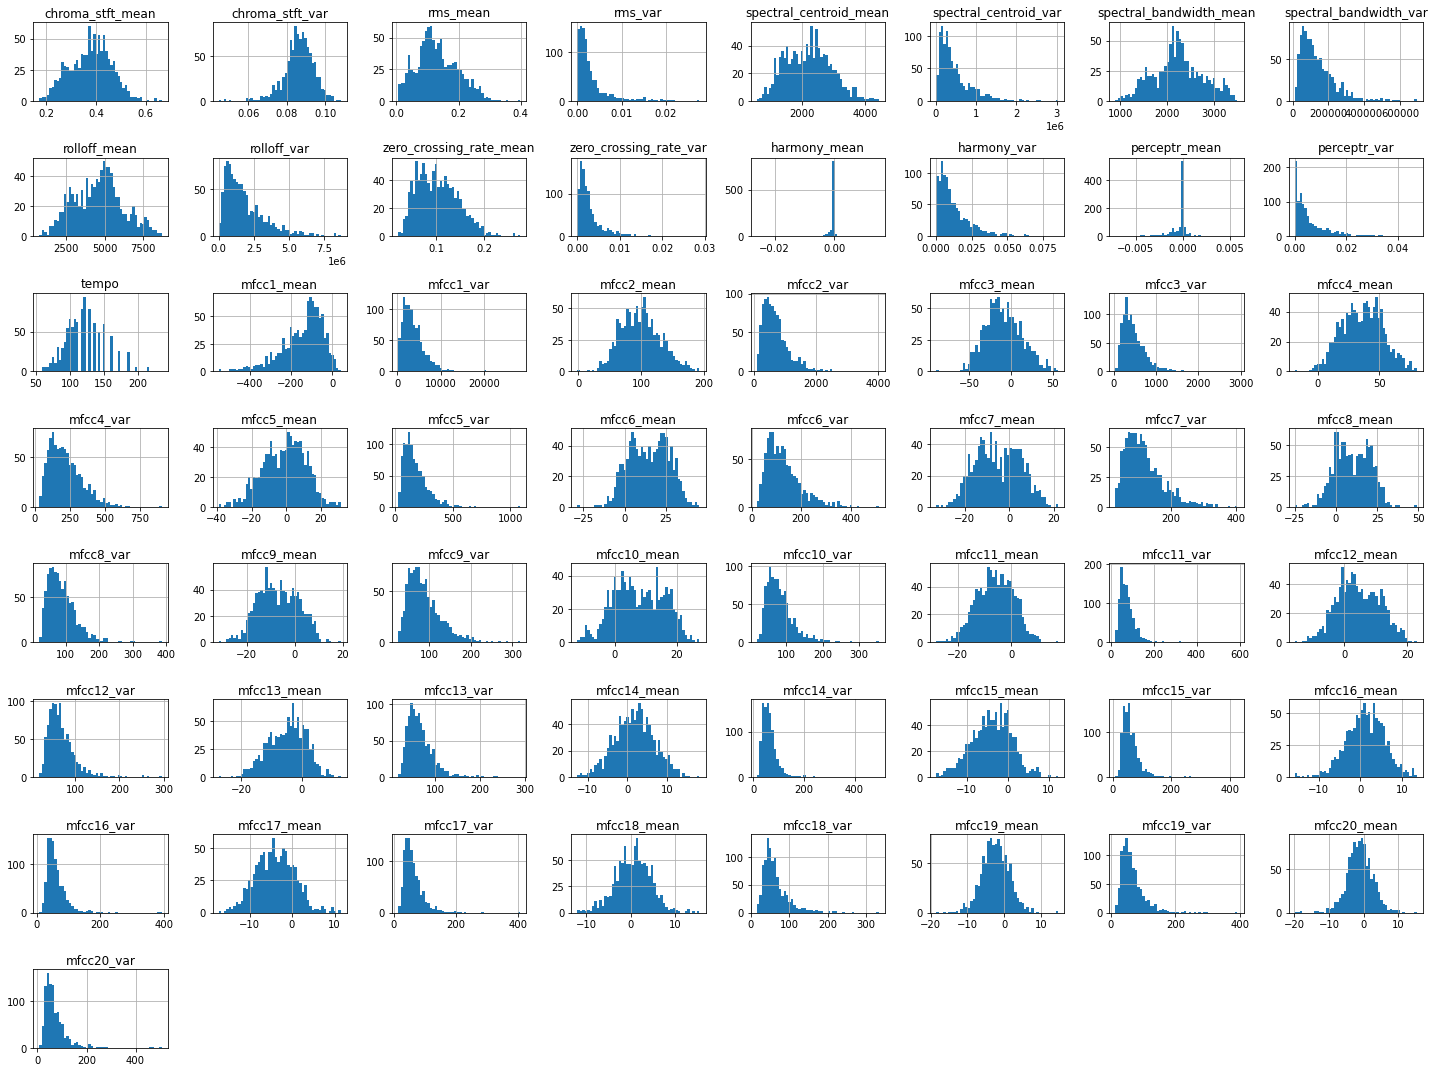

In [16]:
# How do distributions look like?
gtzan_features_df.iloc[:,0:57].hist(bins=50, figsize=(20,15))
plt.tight_layout()
plt.show()

#### Outcome
<div class="alert alert-block alert-info">
    To notice from our gtzan features statistical summary and histograms:
    <br>
    - Values of some features are very different.
        -> Need for scaling features before feeding to machine learning models that care for distances, or use products of weights and input feature values.<br>
    - Shapes of histograms of many features are not 'bell' like normally distributed. That can limit correct usage of data analysis that require normal distribution. In such situation a transformation could be considered. Typical transformations to consider for right skewed distributions include square root(x), logarithm ln(x), and inverse fuction 1/x. Typical transformations to consider for left skewed distributions include mirroring and  square root(k-x), mirroring and logarithm ln(k-x), mirroring and inverse 1/(k-x).
    <br><br>
     - Since data scaling is useful for many models, it will be done to data sets after split to train, validation, and test sets using standard scaler.   
    - For right skewed variables (mainly varianses) taking logarithm is tryed in aim to normalise the distribution. 
    - KNN does not care for distribution, Random Forest can also handle non normally distributed data, also logistic regression can handle not normally distributed data. SVM using RBF kernel benefits from normally distributed data.
<div/>

<a href = '#Introduction'>Back to Introduction</a>


## 3.3 Creating Train-, Validation-, and Test Sets  

At this stage a final test set is put aside in aim to avoid data leakage during further investigation and transformation of the feature data and later on model training.  

Task is to create a model with good classification performance and model generalization. Thus train and test sets should be representative of real life music samples it will classify.  The original data set contains music that has captured from different sources and formats and that sence could represent the diversity of music samples this classifier model would face in reality. The feature data set parts are from the same distribution.Here it is assumed that using stratified sampling i.e., providing samples of each music genre in equal number would support representativeness. This principle is followed when splitting the data set into test and cross-validation parts.  

About the test set size: If the testset portion of all data is too large then there is less samples to use for fitting i.e. training and parameter tuning. This decreases the model performance. If the test set is too small then there is not enough data to gain statistically usefull results on model generalization estimation.  

First 20 % of the data samples are separated to form the final test set which is put aside. The rest 80 % (now called as X_train) is later split into smaller training and validation sets.  

This approch aims for positive effect on efficient data usage and model generalization performance. Information-, and data leakage and available dataset size has been considered.


#### Test set separation


In [17]:
# Test set separation
# separating test set and making sure it stays the same for every following run. Giving a seed for random function.
# The train and test sets could also be saved on file and fetched when needed. But I use the seed for random function.

# 54 is the seed for the random number generator to have the same random numbers accross code runs
# Stratify parameter defines that every label class gets equal number of sample.
# This is important for data representativity.

X_train, X_test, y_train, y_test = train_test_split(gtzan_features_df.iloc[:,0:57], gtzan_features_df.iloc[:,57],
                                                    test_size=0.2, random_state=54, stratify=gtzan_features_df['label'])


#### The rest of original feature data set is to be split into training and validation sets.


In [18]:
X_training,X_val, y_training, y_val = train_test_split(X_train, y_train,
                                                       test_size=0.25, random_state=54, stratify=y_train)

In [19]:
print('Data split')
print(f'  The source feature data set shape is {gtzan_features_30_sec_df.shape} from which name and length columns are dropped.')
print(f'  Testing sets X_test shape is {X_test.shape} and y_test shape is {y_test.shape}')
print(f'  Major training set X_train set shape is {X_train.shape} and y_train shape is {y_train.shape}')
print(f'  Minor training set X_training set shape is {X_training.shape} and y_training shape is {y_training.shape}')
print(f'  Validation set X_val set shape is {X_val.shape} y_val shape is {y_val.shape}')

Data split
  The source feature data set shape is (1000, 60) from which name and length columns are dropped.
  Testing sets X_test shape is (200, 57) and y_test shape is (200,)
  Major training set X_train set shape is (800, 57) and y_train shape is (800,)
  Minor training set X_training set shape is (600, 57) and y_training shape is (600,)
  Validation set X_val set shape is (200, 57) y_val shape is (200,)


<div class="alert alert-block alert-info">
    Training-, validation-, and test set have equal number of samples representing different music genres. In that sence sets used for training, validation, and testing represent nicely the whole data set which consisted of 100 samples of each ten music genres included. This is important when considering the data representativiness. Data representativiness is important for classifier performance.
</div>

#### Outcome - Now the dataset is devided into training, validation, and test sets.

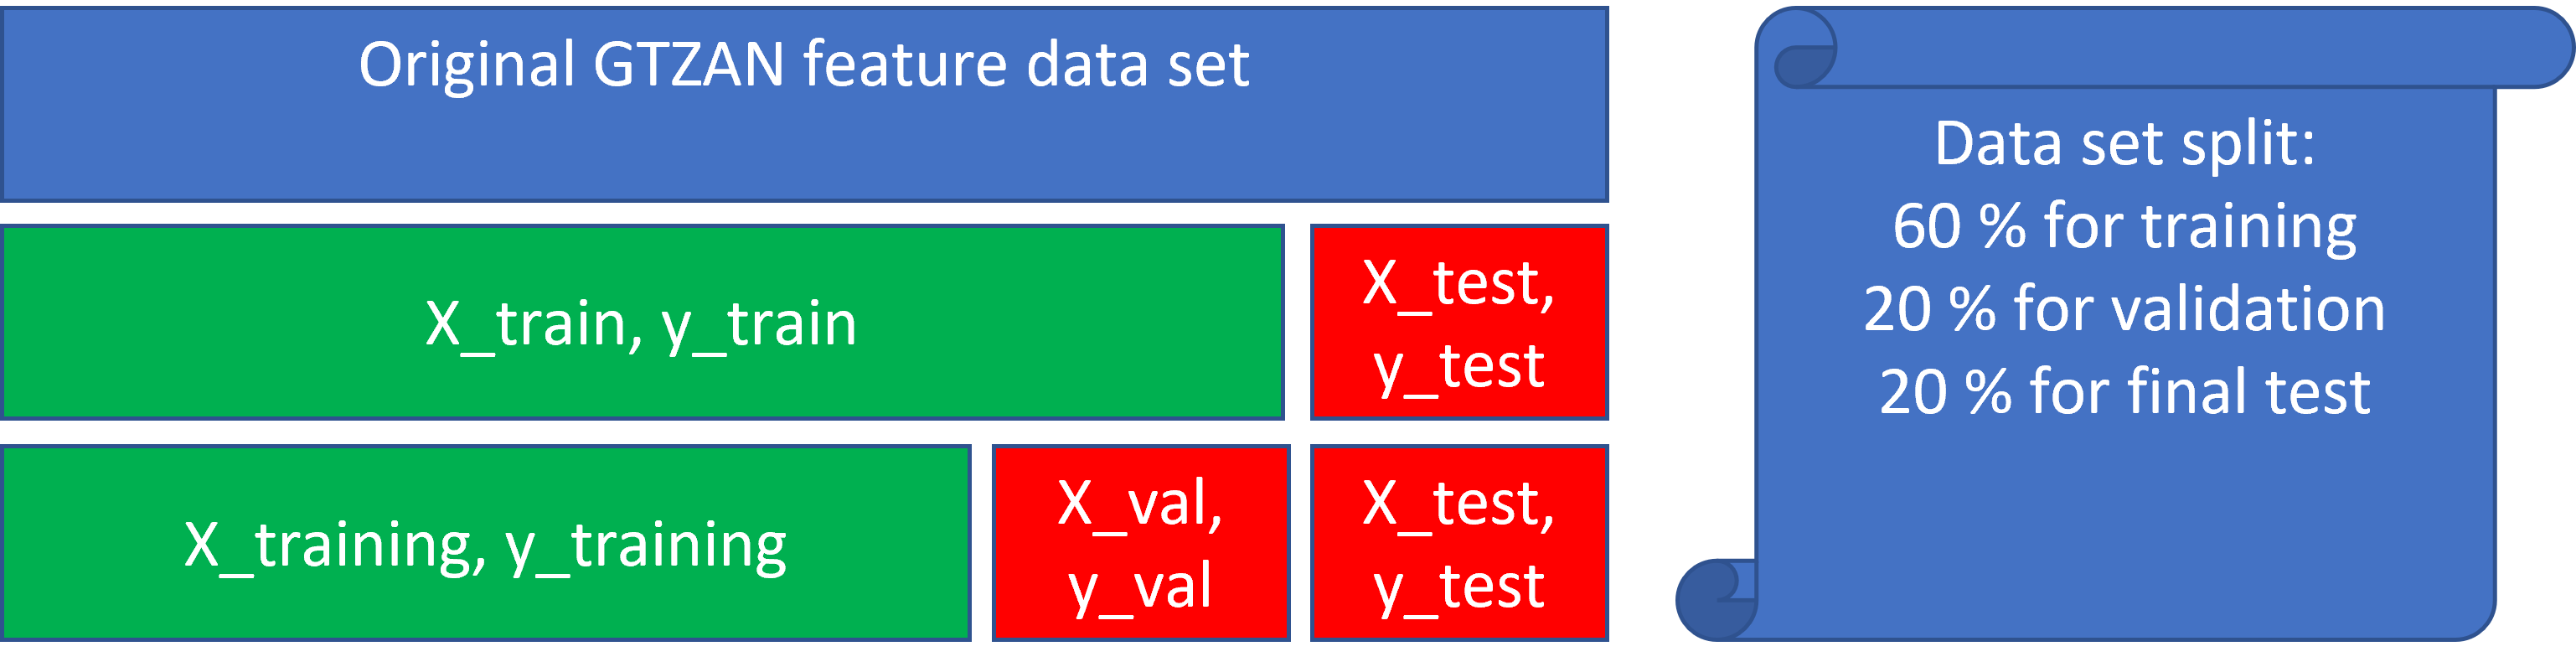

<a href = '#Introduction'>Back to Introduction</a>


## 3.4 Discovering Feature Data

Now dealing with the feature data which exludes the test and validation sets.

In [20]:
# making a exploration copy of feature data without test data
X_training_expl = X_training.copy()
y_training_expl = y_training.copy()
Xy_training_expl = X_training_expl.join(y_training_expl)
print('Shape of total set with features and label is:', Xy_training_expl.shape)

Shape of total set with features and label is: (600, 58)


In [21]:
print(X_training_expl.shape, type(X_training_expl))
print(y_training_expl.shape, type(y_training_expl))

(600, 57) <class 'pandas.core.frame.DataFrame'>
(600,) <class 'pandas.core.series.Series'>



#### How about correlations?

- Checking features against target might give insights on valuable patterns  
- Checking correlations between features is not so valuable, but might give insights on which features to drop, maybe?


#### Deeper look at features - are they all equally valuable for identifying genre? What kind of thoughts arise from visualization


chroma_stft_mean


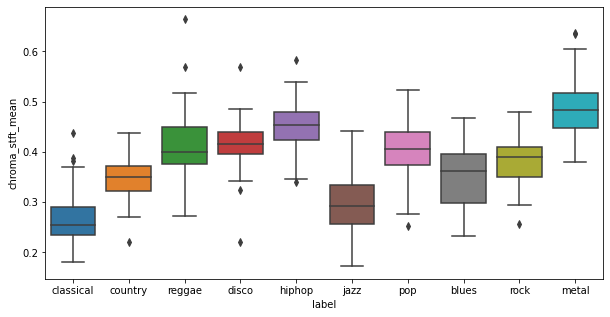

chroma_stft_var


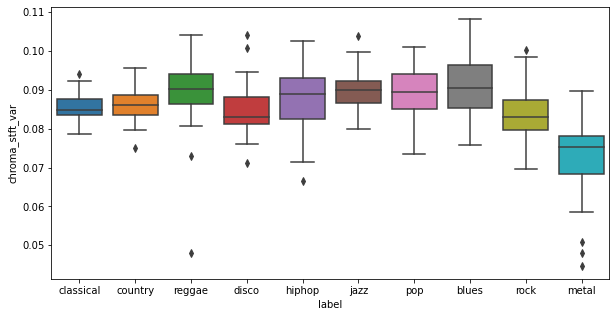

rms_mean


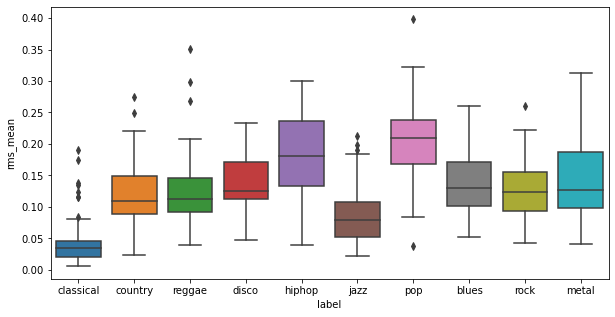

rms_var


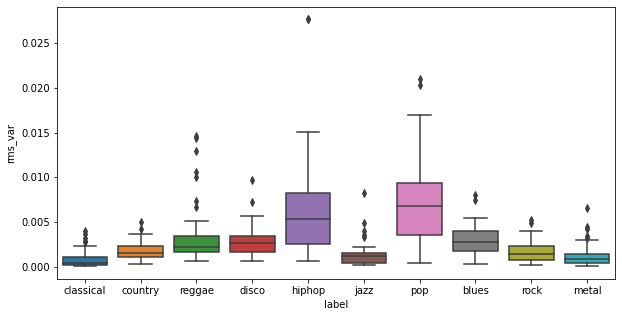

spectral_centroid_mean


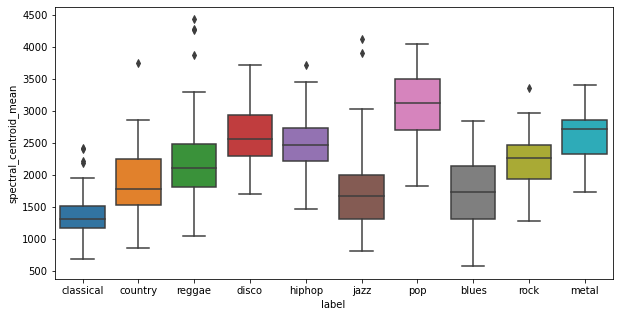

spectral_centroid_var


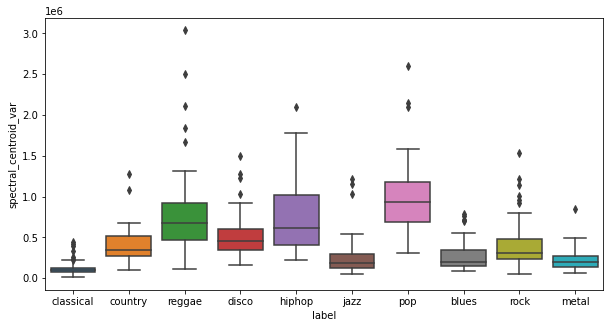

spectral_bandwidth_mean


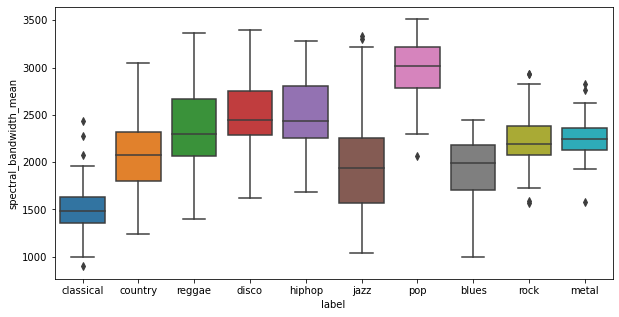

spectral_bandwidth_var


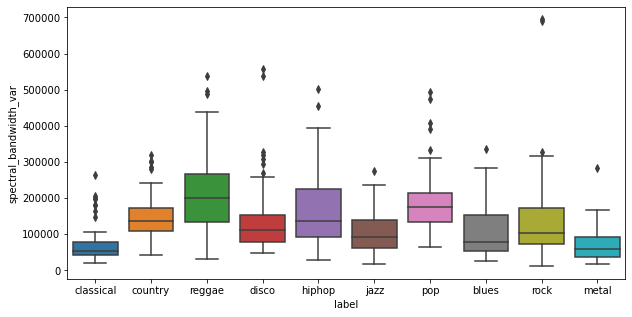

rolloff_mean


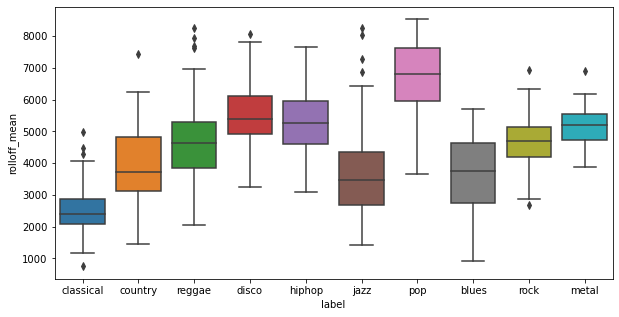

rolloff_var


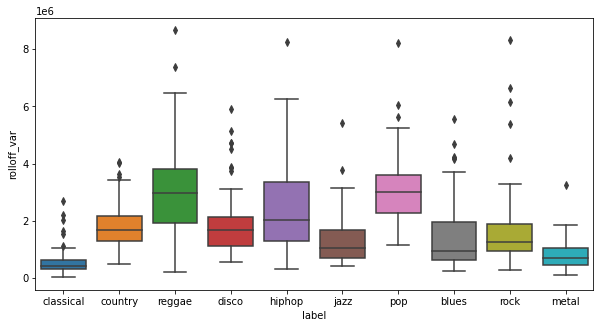

zero_crossing_rate_mean


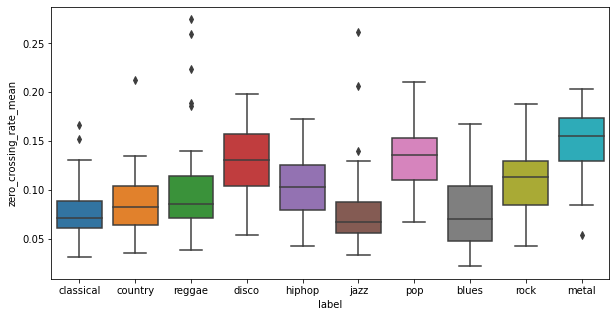

zero_crossing_rate_var


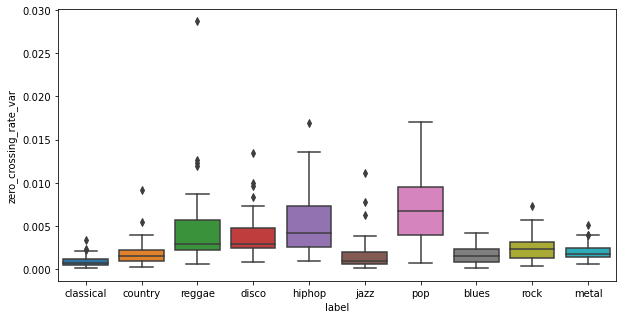

harmony_mean


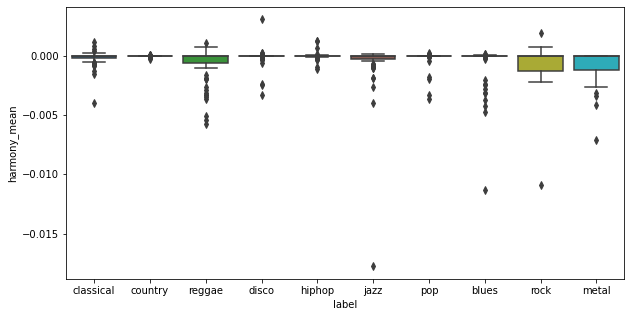

harmony_var


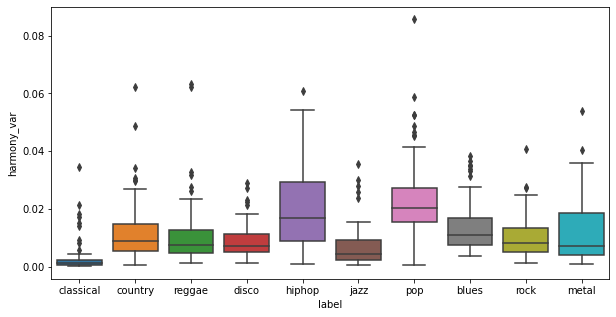

perceptr_mean


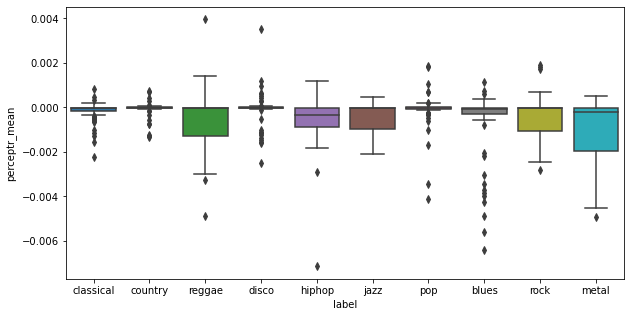

perceptr_var


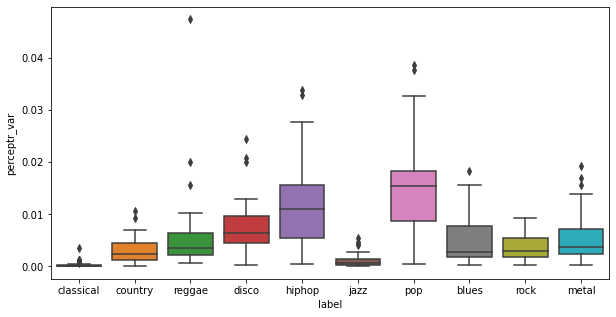

tempo


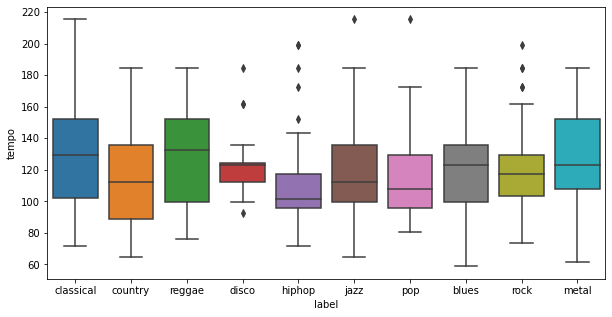

mfcc1_mean


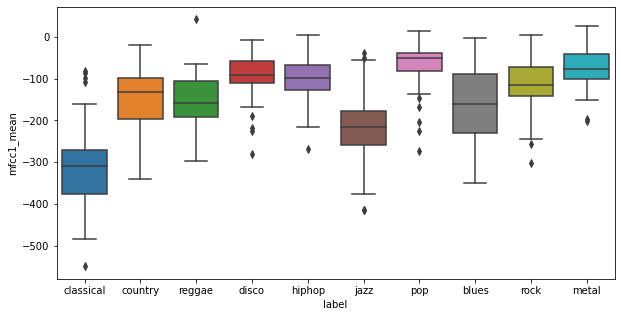

mfcc1_var


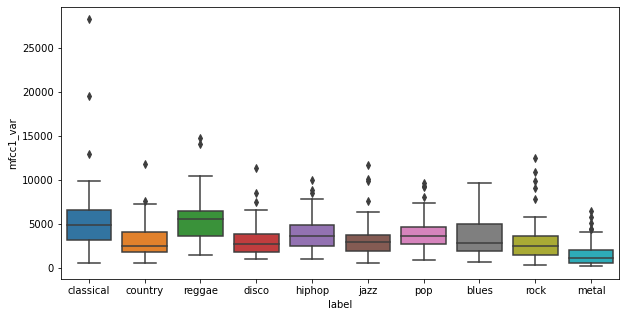

mfcc2_mean


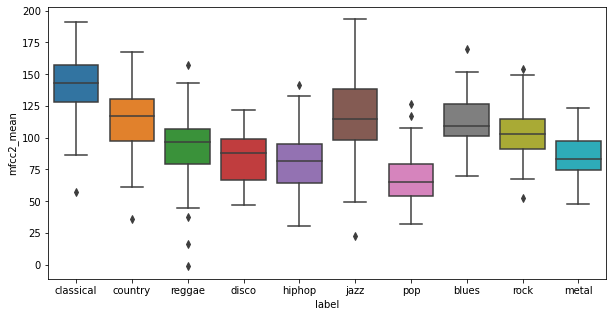

mfcc2_var


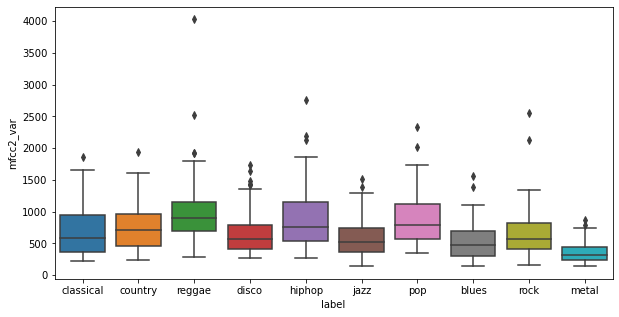

mfcc3_mean


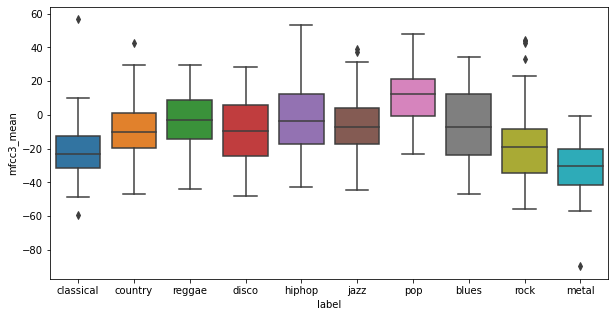

mfcc3_var


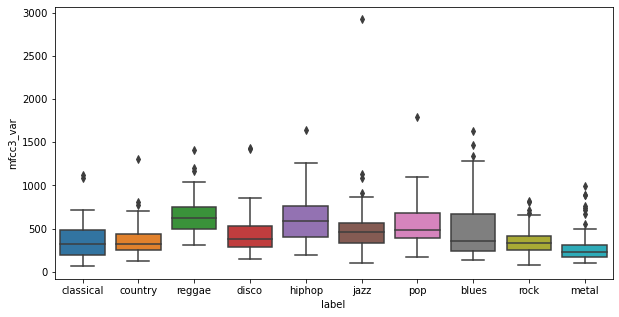

mfcc4_mean


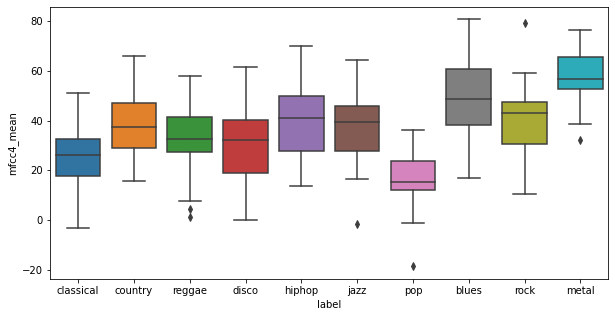

mfcc4_var


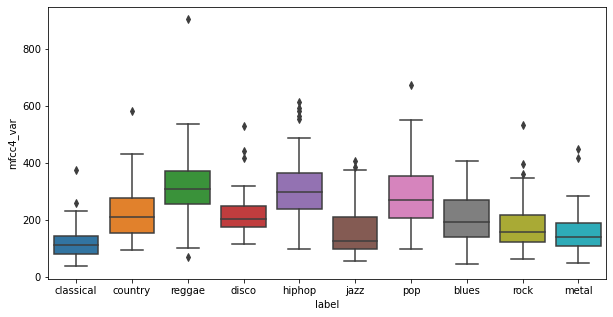

mfcc5_mean


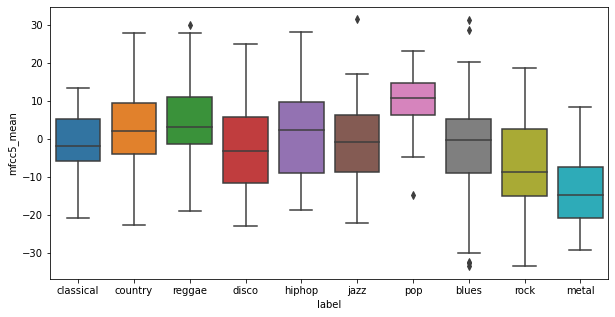

mfcc5_var


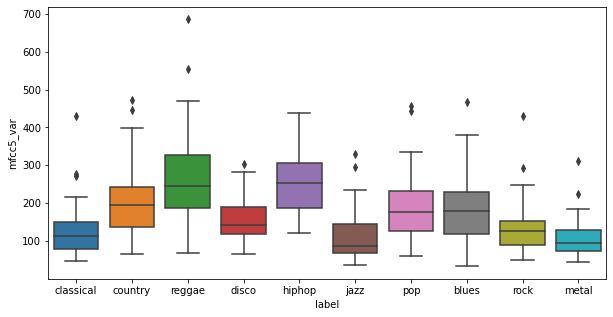

mfcc6_mean


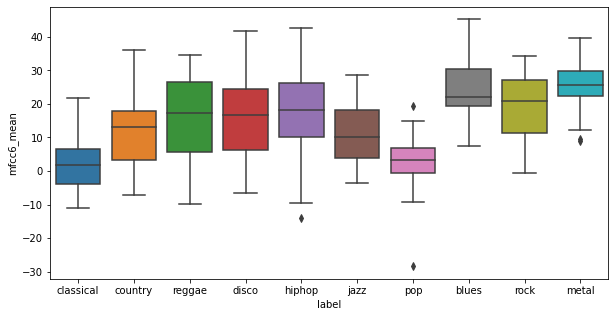

mfcc6_var


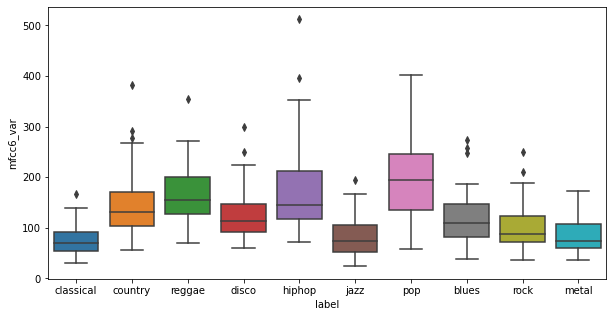

mfcc7_mean


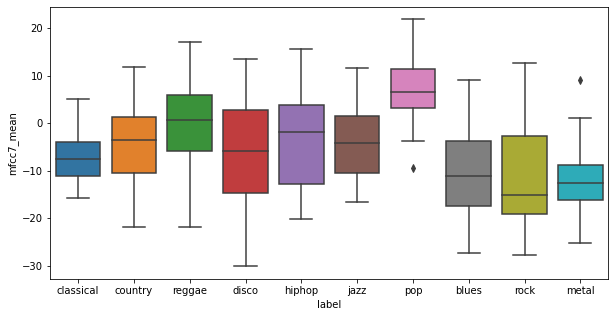

mfcc7_var


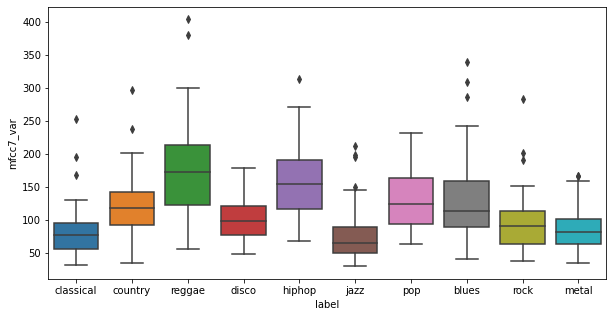

mfcc8_mean


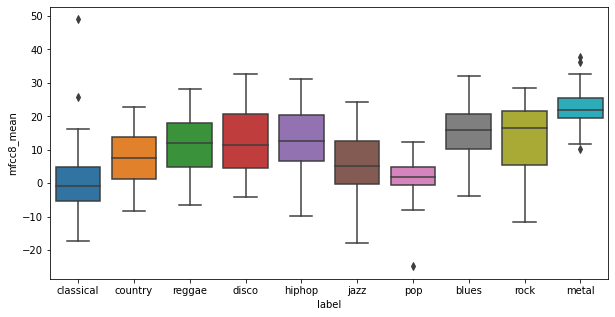

mfcc8_var


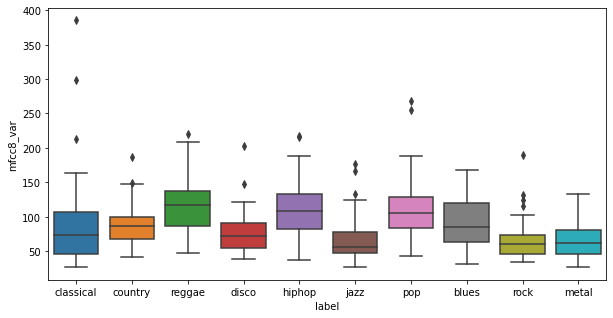

mfcc9_mean


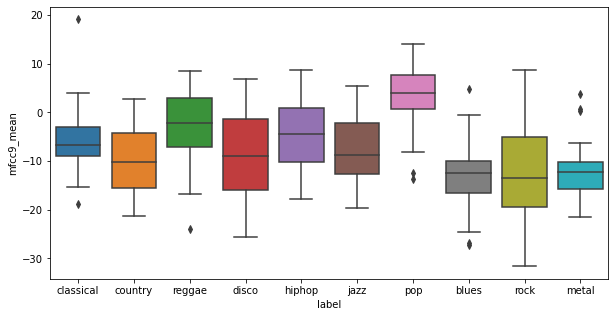

mfcc9_var


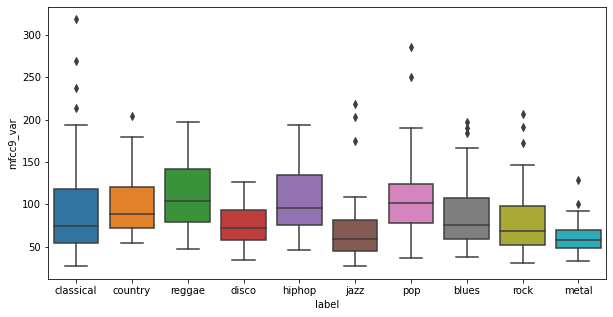

mfcc10_mean


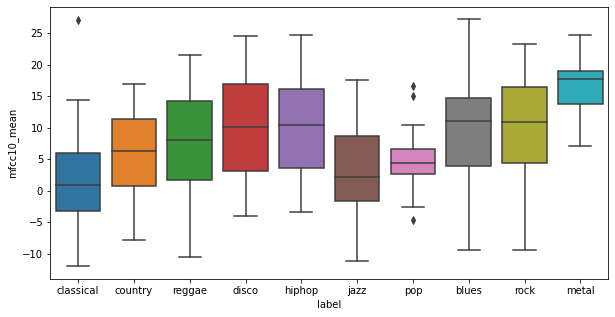

mfcc10_var


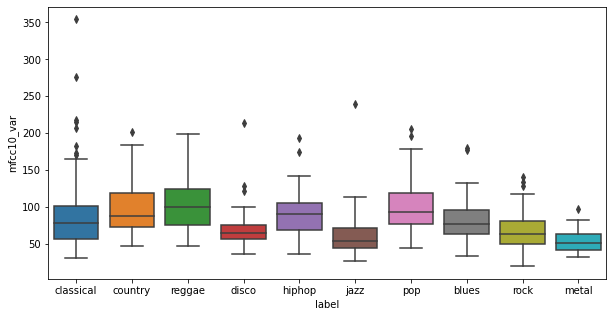

mfcc11_mean


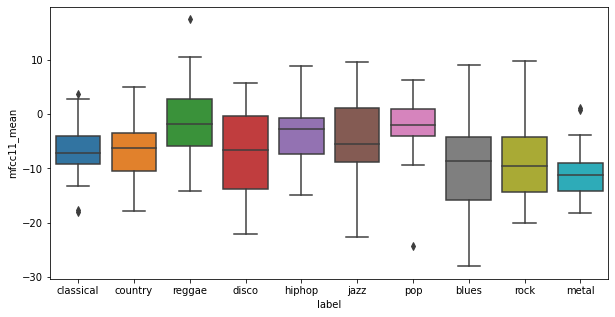

mfcc11_var


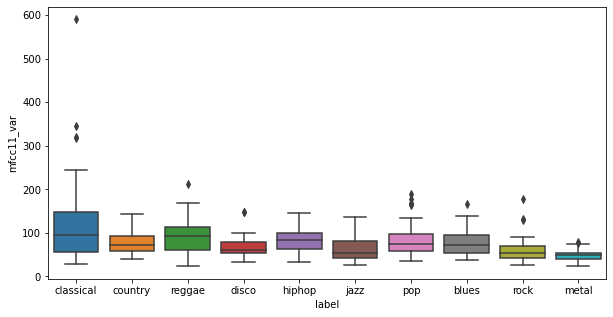

mfcc12_mean


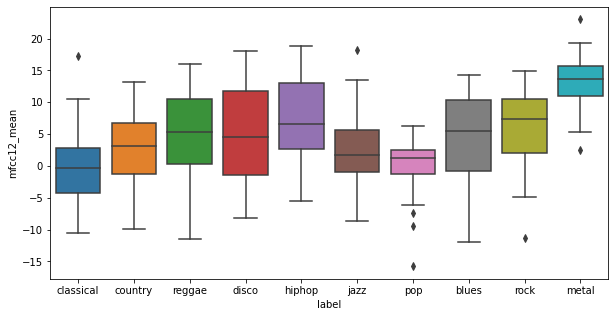

mfcc12_var


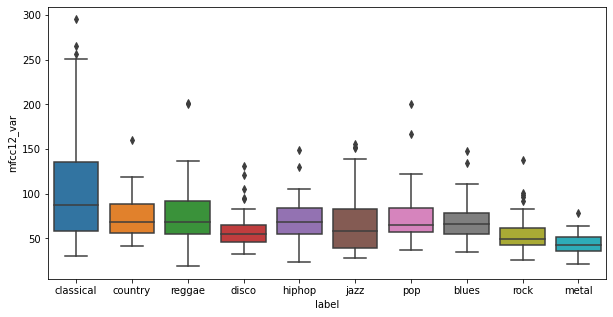

mfcc13_mean


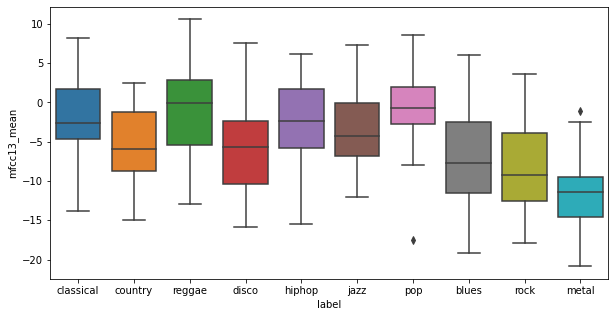

mfcc13_var


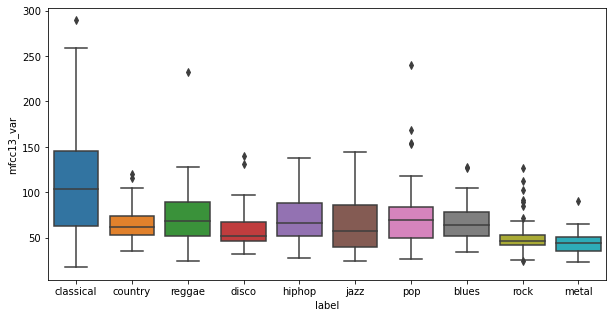

mfcc14_mean


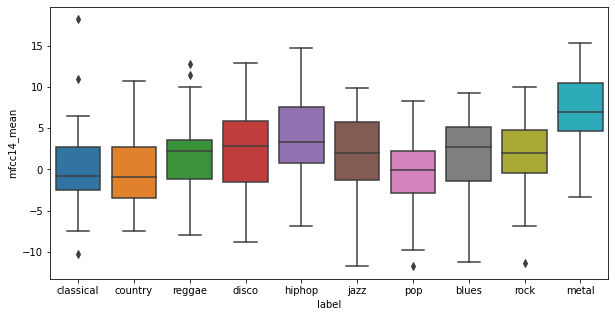

mfcc14_var


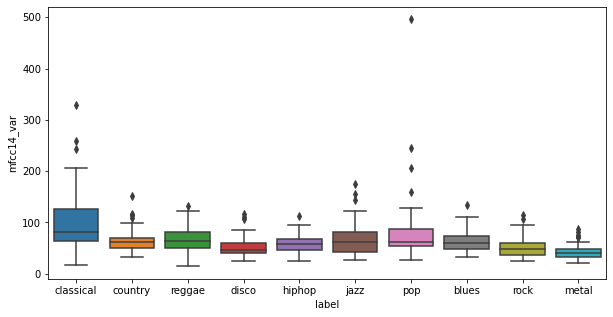

mfcc15_mean


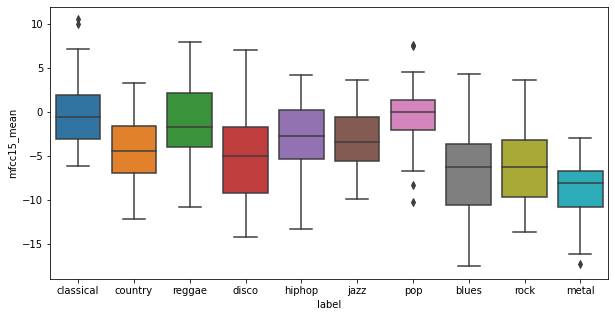

mfcc15_var


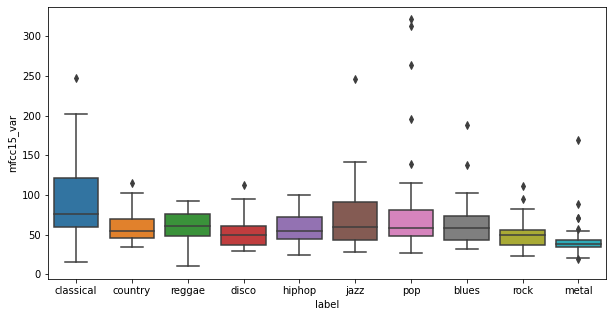

mfcc16_mean


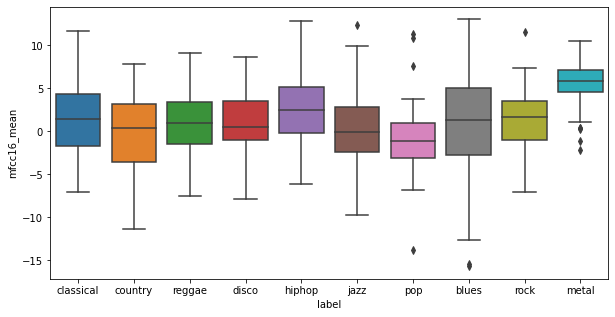

mfcc16_var


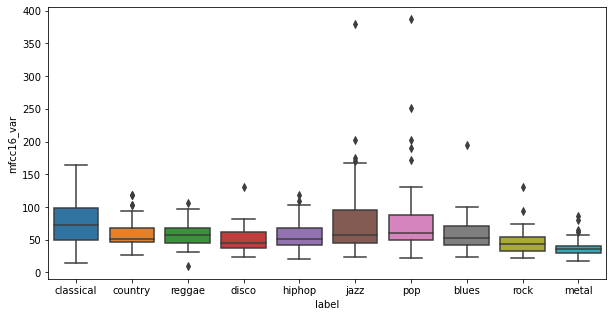

mfcc17_mean


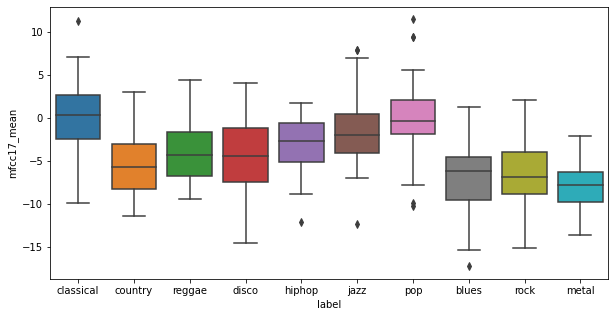

mfcc17_var


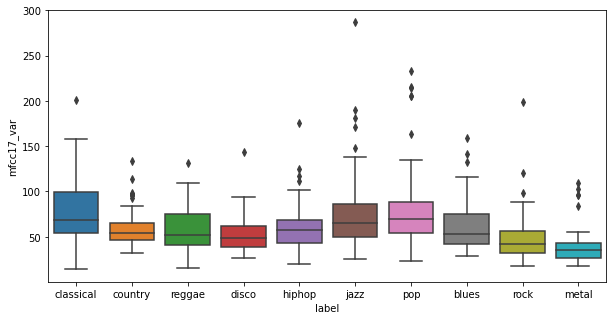

mfcc18_mean


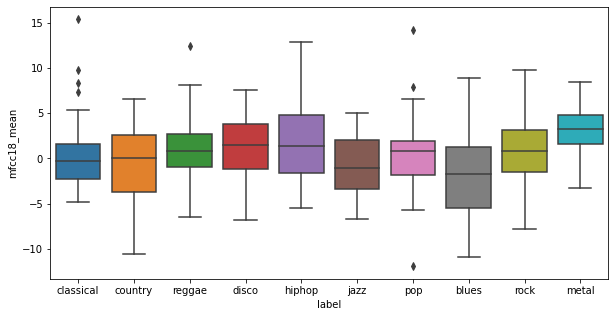

mfcc18_var


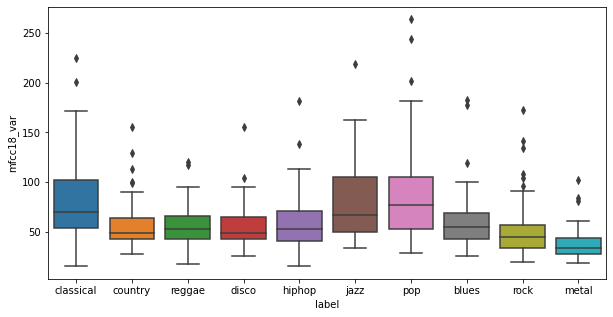

mfcc19_mean


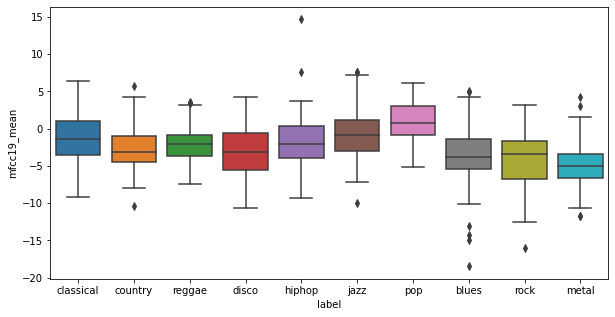

mfcc19_var


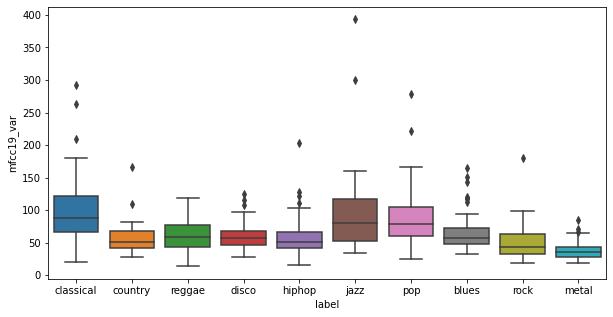

mfcc20_mean


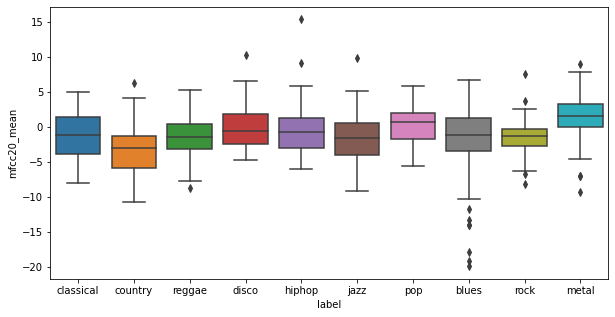

mfcc20_var


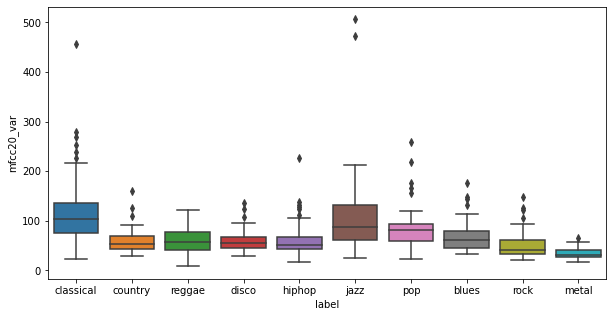

In [22]:

for feature in X_training_expl.columns:
    f, ax = plt.subplots(figsize=(10, 5))
    print(feature)
    sns.boxplot(x=Xy_training_expl.label, y=X_training_expl.loc[:,feature])
    plt.show()
    


#### Any thoughts or insights from the boxplots abowe that show how the value distributions of features is related to genres?

Figures show that some features are better separating some genres than others. Just by looking at the above boxplots, it is hard to find any clear genre separating patterns that would separate all genres from all other.  

Hard to do any conclusions without deeper understanding, but it seems that atleast tempo alone does not separate genres. That is intuitive and the distibutions are heavily overlapping eachother.  

The feature distributions were quite much overlapping on the boxplots. That indicates cumbersome classification task.


#### No use to calculate feature correlations?

For being able to calculate correlations variables should have normal distribution and be non categorical. Here the variable variances are right skewed.  

In this project target is categorical ( music genre). Thus in this project correlation investigations are not available for investigating dependendies between independent feature variable and the dependent variable (genre).  

How about:  
- Transforming labels to one hot coding and then looking at correlation ratios those have with features. Unfortunately this neither overcomes the limitation of categorical nature. Binary variable is categorical. And it is not valid to invent values for music genres. In principle categorical variables can not be transformed into ordered, or relative, or absolute type scaled variables, it can be senseless.

    - To note still is that correlation ratios need to be looked together with statistial significances if want to make  correct insights from those.  
    - Correlation ratios would need normal distibutions and scales to be at similar magnitude.  
- What can be done is to look at random forest model resulting feature_importances_ -attribute.

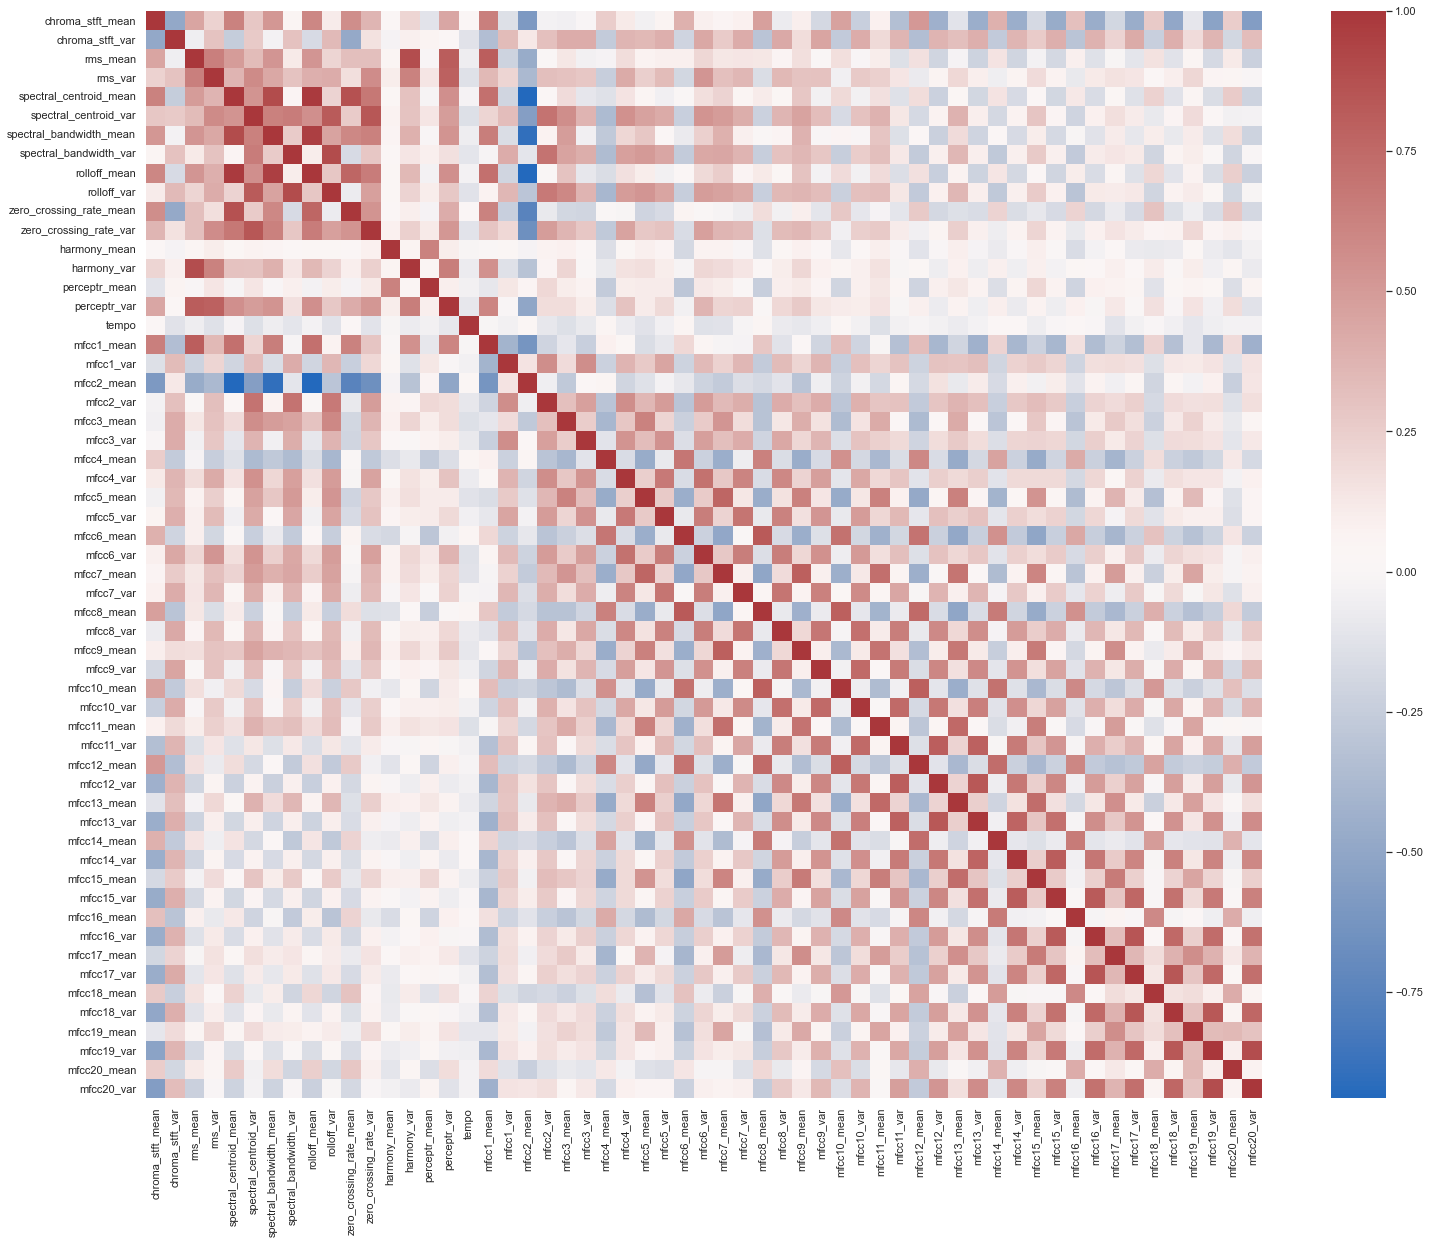

In [23]:
# Correlation are only for numeric values thus filename and target label column is not valid here. 
# label is a qualitative class and thus it do not make sence to change it to numeric value
# because the genre classes do not follow even an ordinal scale or any hierarchy.
# to note too - correlation does not tell causality

# Thus this cell is just 'exploration' cell for experimenting with correlation matrix.
# Features coorrelation matrix as heat map, just for curiosity
# Here the independent variables are included.

# One needs to understand audio features meaning and what they reprecent
# in aim to think what the different correlations might indicate.

correlation_matrix = X_training_expl.corr()
sns.set_theme()
f, ax = plt.subplots(figsize=(25, 20))
sns.heatmap(correlation_matrix, annot=False, ax=ax, cmap='vlag')
plt.show()

Thoughts from GTZAN feature correlation heatmap abowe.  

Tempo seems to be uncorrelated with all other features. In the earlier feature plots against labels it was visible that tempo was not alone separating any of the genres. On the other hand it might be bringing value together with the other features.


## 3.5 Outcome


One knows now what the data consists of and how it looks statistically. One got familiar with the features and how the distributions of those might correlate with the target class. One got information on what kind of data preparations are beneficial or required to do before data is ready for input to machine learning. The test set has been separated and put aside. Similarly, the remaining data has been split for training and validation parts.

<a href = '#Introduction'>Back to Introduction</a>


## 4. Data Preparation: Preparing Data for Machine Learning Algorithms

#### Transformation pipelines

- Cleaning data if found being in need for that. This time our set seemed fine, with no missing values. And no samples to exclude from the data. Only possibly to exlude some features if the importance indications are very small compared to others. But that can be checked only after building the random forest model and checking the feature importance values it provides.

- Scaling will be used for all eventhough feature scaling is not necessary for random forests since that algorithm don't care for the differencies in scales of variables.

- As found out earlier, dealing with right skewed variables could be considered. Thus taking a logarithm might help normalising the distributions of such variables.


#### Making working copy of data


In [24]:
# Protecting the original sets and working on copies.
X_train_tmp = X_train.copy()
X_training_tmp = X_training.copy()
X_val_tmp = X_val.copy()
X_test_tmp = X_test.copy()

<a href = '#Introduction'>Back to Introduction</a>


## 4.1 Transforming Right Skewed Variables with ln(x)


In [25]:
# Columns below got by looking closely at the hist diagrams plotted earlier 
right_skewed_columns = [3,5,7,9,11,13,15,18,20,22,24,26,28,30,32,34,36,40,42,44,46,48,50,52,54,56]

for column in right_skewed_columns:
    for row in range(X_train_tmp.shape[0]):
        X_train_tmp.iloc[row,column] = math.log(X_train_tmp.iloc[row,column])

for column in right_skewed_columns:
    for row in range(X_training_tmp.shape[0]):
        X_training_tmp.iloc[row,column] = math.log(X_training_tmp.iloc[row,column])
        
for column in right_skewed_columns:
    for row in range(X_val_tmp.shape[0]):
        X_val_tmp.iloc[row,column] = math.log(X_val_tmp.iloc[row,column])
        
for column in right_skewed_columns:
    for row in range(X_test_tmp.shape[0]):
        X_test_tmp.iloc[row,column] = math.log(X_test_tmp.iloc[row,column])


#### Was the log manipulation successful? Are the dostributions now more 'bell' like?


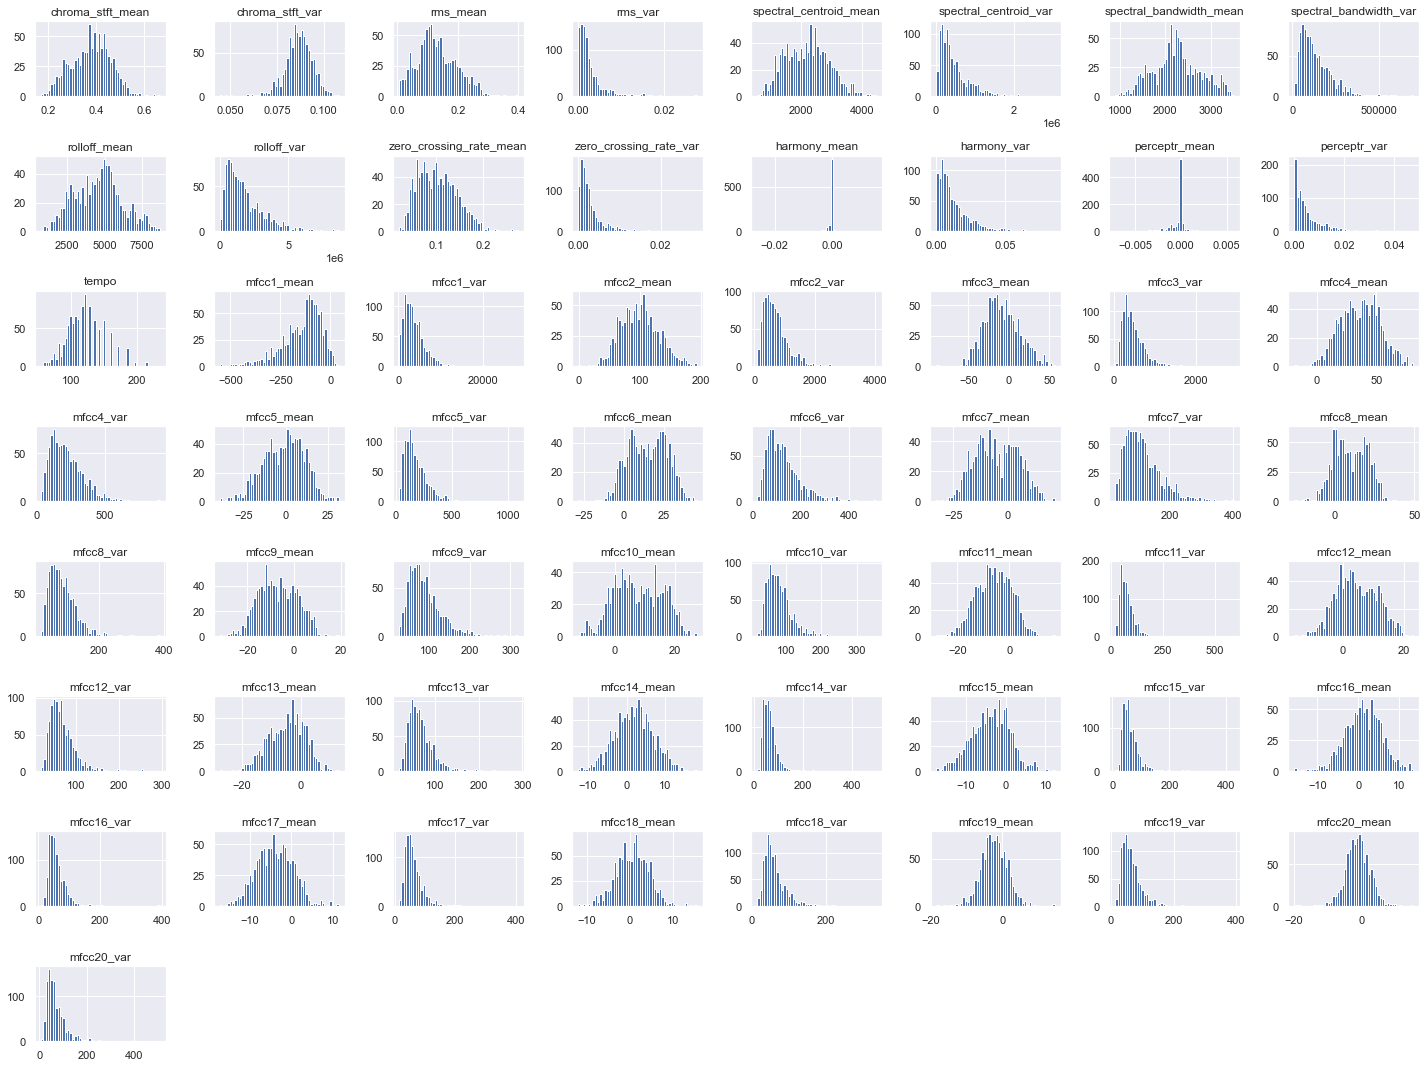

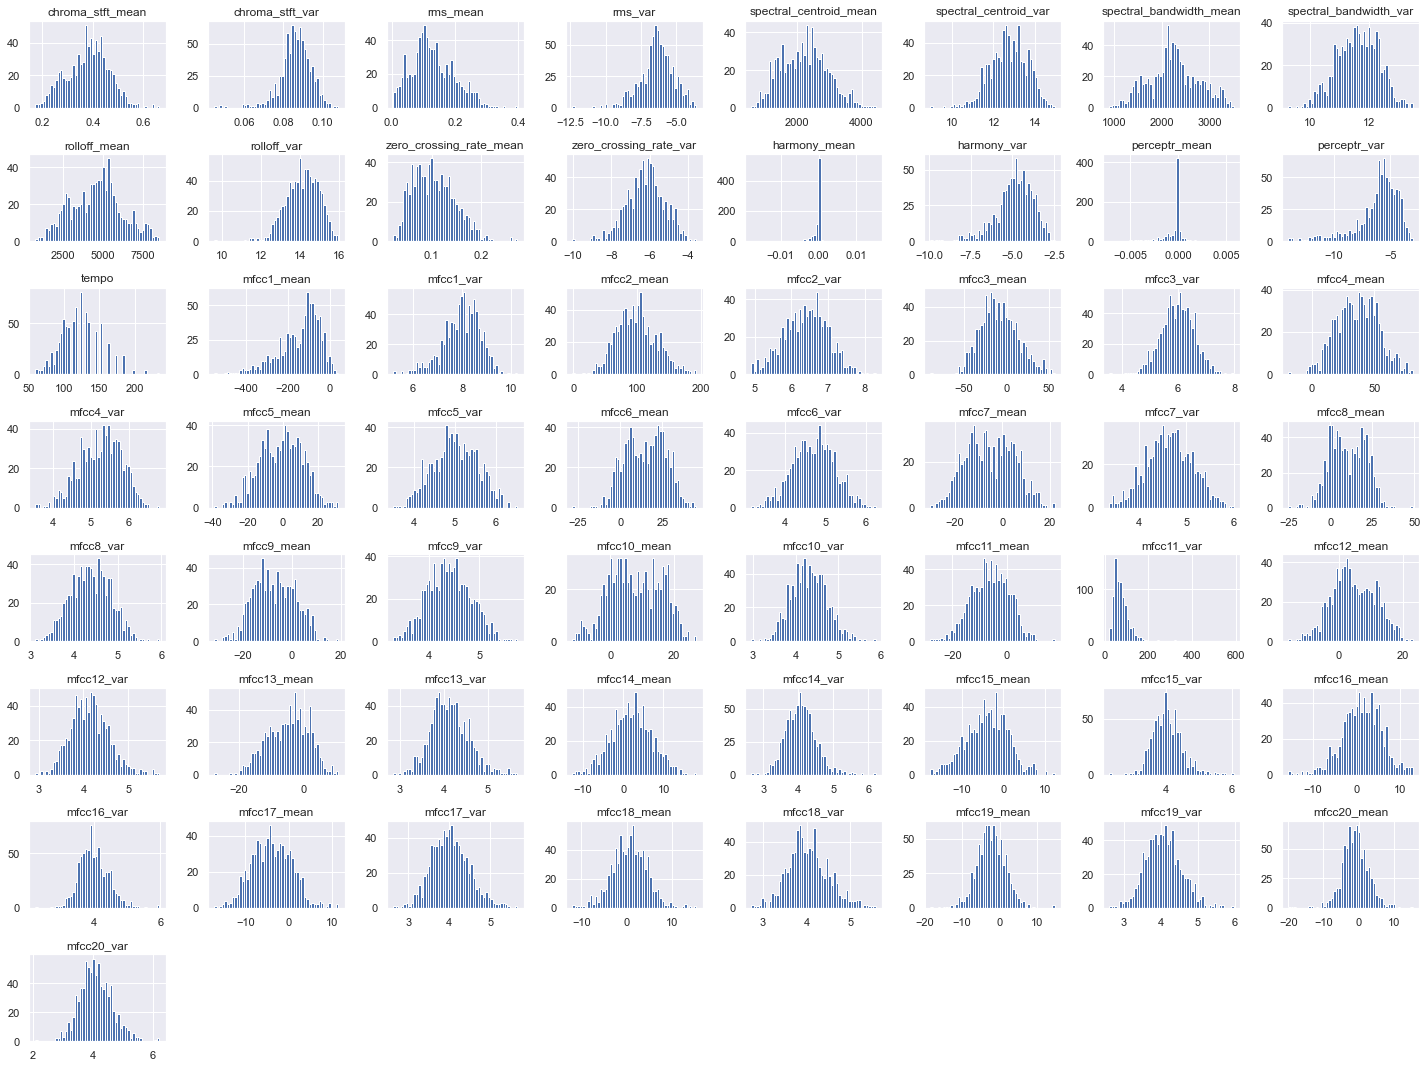

In [26]:
gtzan_features_df.iloc[:,0:57].hist(bins=50, figsize=(20,15))
plt.tight_layout()
plt.show()

X_train_tmp.iloc[:,0:57].hist(bins=50, figsize=(20,15))
plt.tight_layout()
plt.show()


#### Outcome: distributions seem more 'bell' like after the ln(x) transformation - good.


<a href = '#Introduction'>Back to Introduction</a>


## 4.2 Scaling


In [27]:
# copy data and leave the previous phase outcome untached
X_train_sc = X_train_tmp.copy()
X_training_sc = X_training_tmp.copy()
X_val_sc = X_val_tmp.copy()
X_test_sc = X_test_tmp.copy()

In [28]:
# create scaler
# scaler needs to be fitted to training set and not to test set samples in aim not to leak information
scaler = StandardScaler()
scaler.fit(X_training_sc)

StandardScaler()

In [29]:
# scale training, validation, and test sets with scaler
X_train_scaled = scaler.transform(X_train_sc)
X_training_scaled = scaler.transform(X_training_sc)
X_val_scaled = scaler.transform(X_val_sc)
X_test_scaled = scaler.transform(X_test_sc)

<a href = '#Introduction'>Back to Introduction</a>


## 4.3 Save Prepared Training, Validation and Test Sets to Folder for Processed Data


In [30]:
# save prepared datasets for later use

path = os.path.join(PROCESSED_DATA_PATH)

filename = os.path.join(path, experiment_id + 'X_training_scaled.pkl')
pickle.dump(X_training_scaled, open(filename, 'wb'))

filename = os.path.join(path, experiment_id + 'X_train_scaled.pkl')
pickle.dump(X_train_scaled, open(filename, 'wb'))

filename = os.path.join(path, experiment_id + 'X_val_scaled.pkl')
pickle.dump(X_val_scaled, open(filename, 'wb'))

filename = os.path.join(path, experiment_id + 'X_test_scaled.pkl')
pickle.dump(X_test_scaled, open(filename, 'wb'))
                        
filename = os.path.join(path, experiment_id + 'y_training.pkl')
pickle.dump(y_training, open(filename, 'wb'))

filename = os.path.join(path, experiment_id + 'y_train.pkl')
pickle.dump(y_train, open(filename, 'wb'))

filename = os.path.join(path, experiment_id + 'y_val.pkl')
pickle.dump(y_val, open(filename, 'wb'))

filename = os.path.join(path, experiment_id + 'y_test.pkl')
pickle.dump(y_test, open(filename, 'wb'))

<a href = '#Introduction'>Back to Introduction</a>


## 4.4 Quick Check on Random Forest Model Feature Importances


In [31]:
# create and train rf classifier
rf_clf = RandomForestClassifier(max_features="sqrt")
rf_clf.fit(X=X_train_scaled, y=y_train)

# cross-validate rf classifier
strf_kfold_iterator = StratifiedKFold(n_splits=5, random_state=54, shuffle=True)
estimator_name = 'Random Forest'
scores = cross_val_score(rf_clf,X_train_scaled, y_train, cv=strf_kfold_iterator)
print(rf_clf)
print(f'{estimator_name}: ' + f'mean accuracy = {scores.mean():.2%}; ' + f'standard deviation = {scores.std():.2%}')

RandomForestClassifier(max_features='sqrt')
Random Forest: mean accuracy = 65.00%; standard deviation = 3.85%


In [32]:
# see which features mattered the most on this random forest classifier
features = gtzan_features_30_sec_df.iloc[:,2:59].copy()
important_features_dict = {}

for i, val in enumerate(rf_clf.feature_importances_):
    important_features_dict[i] = val

important_features_list = sorted(important_features_dict,
                                 key=important_features_dict.get,
                                 reverse=True)
print('Feature importances:\n')

for fea in range(len(important_features_list)):
    print(f'{features.columns[important_features_list[fea]]:<25}',
          rf_clf.feature_importances_[important_features_list[fea]])

Feature importances:

chroma_stft_mean          0.04565637432960685
perceptr_var              0.04266553729654375
rms_var                   0.03378446683256245
mfcc4_mean                0.03229950526036039
rms_mean                  0.031194451864294905
chroma_stft_var           0.030084895696882087
rolloff_mean              0.02657503475767885
spectral_bandwidth_mean   0.025162830803236377
mfcc1_mean                0.024021430320690092
spectral_centroid_var     0.02374602179349036
mfcc6_mean                0.02240334793778054
harmony_var               0.022155630567003516
rolloff_var               0.021851967416057425
mfcc4_var                 0.0202992456974557
spectral_centroid_mean    0.020284398582593365
mfcc5_var                 0.019777911964634885
zero_crossing_rate_mean   0.0193790858227086
mfcc9_mean                0.01924777689293546
zero_crossing_rate_var    0.017710601691995512
mfcc7_var                 0.017702904158286733
mfcc12_mean               0.017204424991778534
per

In [33]:
# Saving model to file.
model = rf_clf
name = experiment_id + 'baseline_rf_clf_for_feature_importance_investigation.pkl'
filename = os.path.join(MODELS_PATH,name)
pickle.dump(model, open(filename, 'wb'))

<a href = '#Introduction'>Back to Introduction</a>


## 4.5 Outcome

Classification turns out to depend on effects of accumulated feature combinations. Quite small importances per feature. That echoes the thing visible in feature distributions related to genre classes being a lot overlaying eachother.  

No feature is a real selector. Chroma_stft_mean and perceptr_var had the biggest effect around 4.5 %. Some have really small importance value even less than percent. More than half of these features, thus majority, have importance value between 1 % and 2 %.  

Smallest contributions was related to mfcc14, mfcc15, mfcc16, and mfcc17.    

- As seen also from here timbre and energy related features matter for genre classification.

<a href = '#Introduction'>Back to Introduction</a>


## 5. Modeling


Starting from clean desk. First a model baseline is to be prepared. Having the human classification accuracy as a second bencmark, and state of art model's accuracy as third benchmark - modeling work can start. From baseline models towards fine tuned hyperparameter optimised aiming for well performing classifier models.


#### Importing needed libraries


<a href = '#Introduction'>Back to Introduction</a>


## 5.1 Creating Model Baseline Using Several Algorithms with Default Hyperparameters


Model baseline is created by training selected models with algorithms default hyperparameter values. Models are to be build using the 'smaller' training set utilising cross-validation. Then baseline models are saved to projects models directory.


#### Cross validation

- cross-validation and testing is suitable when focusing on generalization performance
- it gives more reliable estimation of model performance than pure training on train set and testing on test set
- cross validation splits the training set into desided amount of folds. One of the folds is always the test fold and other folds are used for training. After one training and testing circle the folds are circled. This train and test is repeated k times (k is the amount of folds). Finally the results of all folds are given. Both mean accuracy over all training times and std of accuracy is given.

In [34]:
# load prepared (ready for input to model) datasets (those are numpy ndarray objects)

path = os.path.join(PROCESSED_DATA_PATH)

filename = os.path.join(path, experiment_id + 'X_training_scaled.pkl')
X_training_scaled = pickle.load(open(filename, 'rb'))

filename = os.path.join(path, experiment_id + 'X_train_scaled.pkl')
X_train_scaled = pickle.load(open(filename, 'rb'))

filename = os.path.join(path, experiment_id + 'X_val_scaled.pkl')
X_val_scaled = pickle.load(open(filename, 'rb'))

filename = os.path.join(path, experiment_id + 'X_test_scaled.pkl')
X_test_scaled = pickle.load(open(filename, 'rb'))
                        
filename = os.path.join(path, experiment_id + 'y_training.pkl')
y_training = pickle.load(open(filename, 'rb'))

filename = os.path.join(path, experiment_id + 'y_train.pkl')
y_train = pickle.load(open(filename, 'rb'))

filename = os.path.join(path, experiment_id + 'y_val.pkl')
y_val = pickle.load(open(filename, 'rb'))

filename = os.path.join(path, experiment_id + 'y_test.pkl')
X_test = pickle.load(open(filename, 'rb'))

In [35]:
# create estimator (model) objects
knn_clf = KNeighborsClassifier(n_neighbors=5)
log_clf = LogisticRegression(solver="lbfgs", max_iter=500)
rf_clf = RandomForestClassifier(max_features="sqrt")
svm_clf = SVC()

print('Knn_clf parameters:',knn_clf.get_params())
print()
print('Log_clf parameters:',log_clf.get_params())
print()
print('Rf_clf parameters:',rf_clf.get_params())
print()
print('SVM_clf parameters:',svm_clf.get_params())

Knn_clf parameters: {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}

Log_clf parameters: {'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 500, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}

Rf_clf parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}

SVM_clf parameters: {'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_fu

In [36]:
# create dictionary of estimators
estimators = {
    'KNearestNeigbor': knn_clf,
    'LogisticRecressor': log_clf,
    'RandomForest': rf_clf,
    'SupportVectorMachine': svm_clf
}

In [37]:
# train estimators using crossvalidation

start = time.time()

for estimator_name, estimator_object in estimators.items():
    strf_kfold = StratifiedKFold(n_splits=10, random_state=54, shuffle=True) # creating cross validation iterator
    scores = cross_val_score(estimator_object,X_training_scaled,y_training, cv=strf_kfold)
    print(f'{estimator_name:<20}: '
          + f'mean accuracy = {scores.mean():.2%}; '
          + f'standard deviation = {scores.std():.2%}')
    name = experiment_id + 'baseline_model_' + estimator_name +'.pkl'
    filename = os.path.join(MODELS_PATH,name)
    pickle.dump(estimator_object, open(filename, 'wb'))
    print(f'Baseline model {estimator_name} saved to file {name} in model folder.')
    print()
    
end = time.time()
print(f'Time for creating baseline models: {end - start} seconds')

KNearestNeigbor     : mean accuracy = 61.00%; standard deviation = 4.42%
Baseline model KNearestNeigbor saved to file exp01_baseline_model_KNearestNeigbor.pkl in model folder.

LogisticRecressor   : mean accuracy = 67.83%; standard deviation = 6.37%
Baseline model LogisticRecressor saved to file exp01_baseline_model_LogisticRecressor.pkl in model folder.

RandomForest        : mean accuracy = 66.67%; standard deviation = 3.73%
Baseline model RandomForest saved to file exp01_baseline_model_RandomForest.pkl in model folder.

SupportVectorMachine: mean accuracy = 66.67%; standard deviation = 4.65%
Baseline model SupportVectorMachine saved to file exp01_baseline_model_SupportVectorMachine.pkl in model folder.

Time for creating baseline models: 4.5561439990997314 seconds


<a href = '#Introduction'>Back to Introduction</a>


## 5.1.2 Random Forest Classifier Performance and Error Checking


In [38]:
# train the model with training set
rf_clf.fit(X_training_scaled, y_training)

RandomForestClassifier(max_features='sqrt')

In [39]:
# predicting
predicted = rf_clf.predict(X=X_val_scaled)
expected = y_val

In [40]:
wrong = [(p, e) for (p, e) in zip(predicted, expected) if p != e]

In [41]:
# classification accuracy
print(f'{(len(expected) - len(wrong)) / len(expected):.2%}')

69.00%


In [42]:
# and the same classification accuracy using scores
print(f'{rf_clf.score(X_val_scaled, y_val):.2%}')

69.00%


In [43]:
# printing metrics report
classes = ['blues','classic','country','disco','hiphop','jazz','metall','pop','reggae','rock']
print(classification_report(expected, predicted, target_names=classes, digits=4))

              precision    recall  f1-score   support

       blues     0.6667    0.7000    0.6829        20
     classic     0.9524    1.0000    0.9756        20
     country     0.6316    0.6000    0.6154        20
       disco     0.4000    0.3000    0.3429        20
      hiphop     0.6800    0.8500    0.7556        20
        jazz     0.9000    0.9000    0.9000        20
      metall     0.7308    0.9500    0.8261        20
         pop     0.7273    0.8000    0.7619        20
      reggae     0.5789    0.5500    0.5641        20
        rock     0.4167    0.2500    0.3125        20

    accuracy                         0.6900       200
   macro avg     0.6684    0.6900    0.6737       200
weighted avg     0.6684    0.6900    0.6737       200



In [44]:
# calculating confusion matrix
confusion = confusion_matrix(y_true=expected, y_pred=predicted)
classes_pdser = pd.Series(['blues','classic','country','disco','hiphop','jazz','metall','pop','reggae','rock'])
confusion_df = pd.DataFrame(confusion, index=classes_pdser, columns=classes_pdser)

True classes in rows, predictions in columns


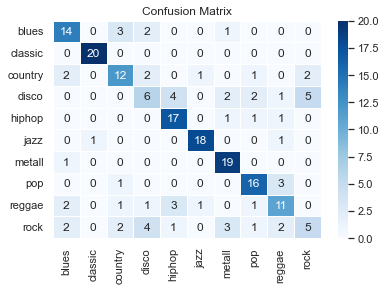

In [45]:
# printing confusion matrix
print('True classes in rows, predictions in columns')
axes = sns.heatmap(confusion_df, annot=True, linewidths=.5, cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

In [46]:
# see which features mattered the most in this random forest classifier

important_features_dict = {}
for i, val in enumerate(rf_clf.feature_importances_):
    important_features_dict[i] = val

important_features_list = sorted(important_features_dict,
                                 key=important_features_dict.get,
                                 reverse=True)
print('Feature importances:\n')

for fea in range(len(important_features_list)):
    print(f'{features.columns[important_features_list[fea]]:<25}',
          rf_clf.feature_importances_[important_features_list[fea]])
    

Feature importances:

perceptr_var              0.04244912175037453
chroma_stft_mean          0.040892591085371556
mfcc4_mean                0.030866182337598462
rms_mean                  0.03062167858629688
spectral_centroid_var     0.029352597595219666
rms_var                   0.029212220140594995
chroma_stft_var           0.028873620696172657
mfcc1_mean                0.02761881844833507
spectral_bandwidth_mean   0.02487831819887684
rolloff_mean              0.02405250461463907
spectral_centroid_mean    0.022875658442060944
mfcc5_var                 0.02239867435060895
mfcc7_var                 0.021259210463027402
mfcc9_mean                0.02097288639143819
zero_crossing_rate_mean   0.02059058789770587
mfcc6_mean                0.020409509466961597
rolloff_var               0.020113719031277854
mfcc4_var                 0.0189394820081117
mfcc12_mean               0.018816326051878215
mfcc20_var                0.018131676131321703
harmony_var               0.0175385800930768
mfc

<a href = '#Introduction'>Back to Introduction</a>


## 5.2 Tuning and Testing Models

- Grid search 
- Analyze the best models and their errors
- Evaluating model on test set


### 5.2.1 Random Forest Model


#### Optimising classifier on accuracy with gridsearch crossvalidation

In [47]:
rf_clf = RandomForestClassifier(max_features="sqrt")

In [48]:
param_grid = { 
    'n_estimators': [10,20,30,50,75,100,150],
    'max_features': ['auto', 'sqrt'],
    'max_depth' : [5,10,20,30],
    'criterion' :['gini', 'entropy']
}

In [49]:
start = time.time()

In [50]:
# Searhing best hyperparameter set that provide best estimator (classifier) accuracy
HPO_grid_search_rf = GridSearchCV(estimator=rf_clf, param_grid=param_grid, cv= strf_kfold,
                                  return_train_score=True, verbose=3, scoring='accuracy')
HPO_grid_search_rf.fit(X_training_scaled, y_training)

Fitting 10 folds for each of 112 candidates, totalling 1120 fits
[CV 1/10] END criterion=gini, max_depth=5, max_features=auto, n_estimators=10;, score=(train=0.798, test=0.600) total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=5, max_features=auto, n_estimators=10;, score=(train=0.767, test=0.550) total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=5, max_features=auto, n_estimators=10;, score=(train=0.783, test=0.433) total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=5, max_features=auto, n_estimators=10;, score=(train=0.759, test=0.600) total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=5, max_features=auto, n_estimators=10;, score=(train=0.791, test=0.500) total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=5, max_features=auto, n_estimators=10;, score=(train=0.787, test=0.550) total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=5, max_features=auto, n_estimators=10;, score=(train=0.772, test=0.617) total time=   0.0s
[CV 8/10] END crit

[CV 3/10] END criterion=gini, max_depth=5, max_features=auto, n_estimators=150;, score=(train=0.863, test=0.550) total time=   0.3s
[CV 4/10] END criterion=gini, max_depth=5, max_features=auto, n_estimators=150;, score=(train=0.872, test=0.683) total time=   0.3s
[CV 5/10] END criterion=gini, max_depth=5, max_features=auto, n_estimators=150;, score=(train=0.900, test=0.600) total time=   0.3s
[CV 6/10] END criterion=gini, max_depth=5, max_features=auto, n_estimators=150;, score=(train=0.876, test=0.500) total time=   0.3s
[CV 7/10] END criterion=gini, max_depth=5, max_features=auto, n_estimators=150;, score=(train=0.902, test=0.650) total time=   0.3s
[CV 8/10] END criterion=gini, max_depth=5, max_features=auto, n_estimators=150;, score=(train=0.883, test=0.633) total time=   0.2s
[CV 9/10] END criterion=gini, max_depth=5, max_features=auto, n_estimators=150;, score=(train=0.883, test=0.617) total time=   0.3s
[CV 10/10] END criterion=gini, max_depth=5, max_features=auto, n_estimators=

[CV 6/10] END criterion=gini, max_depth=5, max_features=sqrt, n_estimators=100;, score=(train=0.872, test=0.517) total time=   0.1s
[CV 7/10] END criterion=gini, max_depth=5, max_features=sqrt, n_estimators=100;, score=(train=0.878, test=0.667) total time=   0.2s
[CV 8/10] END criterion=gini, max_depth=5, max_features=sqrt, n_estimators=100;, score=(train=0.881, test=0.650) total time=   0.1s
[CV 9/10] END criterion=gini, max_depth=5, max_features=sqrt, n_estimators=100;, score=(train=0.865, test=0.633) total time=   0.1s
[CV 10/10] END criterion=gini, max_depth=5, max_features=sqrt, n_estimators=100;, score=(train=0.876, test=0.567) total time=   0.1s
[CV 1/10] END criterion=gini, max_depth=5, max_features=sqrt, n_estimators=150;, score=(train=0.891, test=0.650) total time=   0.3s
[CV 2/10] END criterion=gini, max_depth=5, max_features=sqrt, n_estimators=150;, score=(train=0.881, test=0.667) total time=   0.2s
[CV 3/10] END criterion=gini, max_depth=5, max_features=sqrt, n_estimators=

[CV 10/10] END criterion=gini, max_depth=10, max_features=auto, n_estimators=75;, score=(train=1.000, test=0.750) total time=   0.1s
[CV 1/10] END criterion=gini, max_depth=10, max_features=auto, n_estimators=100;, score=(train=1.000, test=0.667) total time=   0.1s
[CV 2/10] END criterion=gini, max_depth=10, max_features=auto, n_estimators=100;, score=(train=1.000, test=0.717) total time=   0.3s
[CV 3/10] END criterion=gini, max_depth=10, max_features=auto, n_estimators=100;, score=(train=1.000, test=0.583) total time=   0.2s
[CV 4/10] END criterion=gini, max_depth=10, max_features=auto, n_estimators=100;, score=(train=1.000, test=0.683) total time=   0.1s
[CV 5/10] END criterion=gini, max_depth=10, max_features=auto, n_estimators=100;, score=(train=1.000, test=0.600) total time=   0.2s
[CV 6/10] END criterion=gini, max_depth=10, max_features=auto, n_estimators=100;, score=(train=1.000, test=0.617) total time=   0.2s
[CV 7/10] END criterion=gini, max_depth=10, max_features=auto, n_esti

[CV 2/10] END criterion=gini, max_depth=10, max_features=sqrt, n_estimators=75;, score=(train=1.000, test=0.717) total time=   0.2s
[CV 3/10] END criterion=gini, max_depth=10, max_features=sqrt, n_estimators=75;, score=(train=1.000, test=0.633) total time=   0.1s
[CV 4/10] END criterion=gini, max_depth=10, max_features=sqrt, n_estimators=75;, score=(train=1.000, test=0.717) total time=   0.1s
[CV 5/10] END criterion=gini, max_depth=10, max_features=sqrt, n_estimators=75;, score=(train=1.000, test=0.617) total time=   0.1s
[CV 6/10] END criterion=gini, max_depth=10, max_features=sqrt, n_estimators=75;, score=(train=1.000, test=0.583) total time=   0.2s
[CV 7/10] END criterion=gini, max_depth=10, max_features=sqrt, n_estimators=75;, score=(train=1.000, test=0.667) total time=   0.2s
[CV 8/10] END criterion=gini, max_depth=10, max_features=sqrt, n_estimators=75;, score=(train=1.000, test=0.600) total time=   0.1s
[CV 9/10] END criterion=gini, max_depth=10, max_features=sqrt, n_estimators=

[CV 4/10] END criterion=gini, max_depth=20, max_features=auto, n_estimators=50;, score=(train=1.000, test=0.683) total time=   0.1s
[CV 5/10] END criterion=gini, max_depth=20, max_features=auto, n_estimators=50;, score=(train=1.000, test=0.667) total time=   0.1s
[CV 6/10] END criterion=gini, max_depth=20, max_features=auto, n_estimators=50;, score=(train=1.000, test=0.550) total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=20, max_features=auto, n_estimators=50;, score=(train=1.000, test=0.617) total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=20, max_features=auto, n_estimators=50;, score=(train=1.000, test=0.683) total time=   0.1s
[CV 9/10] END criterion=gini, max_depth=20, max_features=auto, n_estimators=50;, score=(train=1.000, test=0.633) total time=   0.1s
[CV 10/10] END criterion=gini, max_depth=20, max_features=auto, n_estimators=50;, score=(train=1.000, test=0.667) total time=   0.1s
[CV 1/10] END criterion=gini, max_depth=20, max_features=auto, n_estimators

[CV 7/10] END criterion=gini, max_depth=20, max_features=sqrt, n_estimators=30;, score=(train=1.000, test=0.667) total time=   0.1s
[CV 8/10] END criterion=gini, max_depth=20, max_features=sqrt, n_estimators=30;, score=(train=1.000, test=0.633) total time=   0.1s
[CV 9/10] END criterion=gini, max_depth=20, max_features=sqrt, n_estimators=30;, score=(train=1.000, test=0.667) total time=   0.1s
[CV 10/10] END criterion=gini, max_depth=20, max_features=sqrt, n_estimators=30;, score=(train=1.000, test=0.617) total time=   0.1s
[CV 1/10] END criterion=gini, max_depth=20, max_features=sqrt, n_estimators=50;, score=(train=1.000, test=0.733) total time=   0.3s
[CV 2/10] END criterion=gini, max_depth=20, max_features=sqrt, n_estimators=50;, score=(train=1.000, test=0.700) total time=   0.2s
[CV 3/10] END criterion=gini, max_depth=20, max_features=sqrt, n_estimators=50;, score=(train=1.000, test=0.633) total time=   0.1s
[CV 4/10] END criterion=gini, max_depth=20, max_features=sqrt, n_estimators

[CV 10/10] END criterion=gini, max_depth=30, max_features=auto, n_estimators=20;, score=(train=1.000, test=0.617) total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=30, max_features=auto, n_estimators=30;, score=(train=1.000, test=0.600) total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=30, max_features=auto, n_estimators=30;, score=(train=1.000, test=0.683) total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=30, max_features=auto, n_estimators=30;, score=(train=1.000, test=0.683) total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=30, max_features=auto, n_estimators=30;, score=(train=1.000, test=0.750) total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=30, max_features=auto, n_estimators=30;, score=(train=1.000, test=0.617) total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=30, max_features=auto, n_estimators=30;, score=(train=1.000, test=0.567) total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=30, max_features=auto, n_estimators

[CV 2/10] END criterion=gini, max_depth=30, max_features=sqrt, n_estimators=20;, score=(train=1.000, test=0.583) total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=30, max_features=sqrt, n_estimators=20;, score=(train=1.000, test=0.533) total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=30, max_features=sqrt, n_estimators=20;, score=(train=0.998, test=0.633) total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=30, max_features=sqrt, n_estimators=20;, score=(train=1.000, test=0.617) total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=30, max_features=sqrt, n_estimators=20;, score=(train=0.998, test=0.517) total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=30, max_features=sqrt, n_estimators=20;, score=(train=1.000, test=0.717) total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=30, max_features=sqrt, n_estimators=20;, score=(train=1.000, test=0.617) total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=30, max_features=sqrt, n_estimators=

[CV 6/10] END criterion=entropy, max_depth=5, max_features=auto, n_estimators=10;, score=(train=0.857, test=0.517) total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=5, max_features=auto, n_estimators=10;, score=(train=0.815, test=0.517) total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=5, max_features=auto, n_estimators=10;, score=(train=0.852, test=0.650) total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=5, max_features=auto, n_estimators=10;, score=(train=0.826, test=0.450) total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=5, max_features=auto, n_estimators=10;, score=(train=0.796, test=0.600) total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=5, max_features=auto, n_estimators=20;, score=(train=0.876, test=0.617) total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=5, max_features=auto, n_estimators=20;, score=(train=0.863, test=0.633) total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=5, max_features=au

[CV 7/10] END criterion=entropy, max_depth=5, max_features=auto, n_estimators=150;, score=(train=0.928, test=0.600) total time=   1.2s
[CV 8/10] END criterion=entropy, max_depth=5, max_features=auto, n_estimators=150;, score=(train=0.911, test=0.650) total time=   3.9s
[CV 9/10] END criterion=entropy, max_depth=5, max_features=auto, n_estimators=150;, score=(train=0.911, test=0.600) total time=   1.5s
[CV 10/10] END criterion=entropy, max_depth=5, max_features=auto, n_estimators=150;, score=(train=0.896, test=0.567) total time=   1.0s
[CV 1/10] END criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=10;, score=(train=0.794, test=0.550) total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=10;, score=(train=0.809, test=0.600) total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=10;, score=(train=0.809, test=0.483) total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=5, max_feature

[CV 9/10] END criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=100;, score=(train=0.896, test=0.617) total time=   0.9s
[CV 10/10] END criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=100;, score=(train=0.909, test=0.567) total time=   0.7s
[CV 1/10] END criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=150;, score=(train=0.909, test=0.650) total time=   1.1s
[CV 2/10] END criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=150;, score=(train=0.919, test=0.600) total time=   0.9s
[CV 3/10] END criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=150;, score=(train=0.917, test=0.617) total time=   0.9s
[CV 4/10] END criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=150;, score=(train=0.911, test=0.650) total time=   1.0s
[CV 5/10] END criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=150;, score=(train=0.924, test=0.667) total time=   1.0s
[CV 6/10] END criterion=entropy, max_depth=5, max_feat

[CV 10/10] END criterion=entropy, max_depth=10, max_features=auto, n_estimators=75;, score=(train=1.000, test=0.650) total time=   0.4s
[CV 1/10] END criterion=entropy, max_depth=10, max_features=auto, n_estimators=100;, score=(train=1.000, test=0.667) total time=   0.6s
[CV 2/10] END criterion=entropy, max_depth=10, max_features=auto, n_estimators=100;, score=(train=1.000, test=0.700) total time=   0.6s
[CV 3/10] END criterion=entropy, max_depth=10, max_features=auto, n_estimators=100;, score=(train=1.000, test=0.650) total time=   1.2s
[CV 4/10] END criterion=entropy, max_depth=10, max_features=auto, n_estimators=100;, score=(train=1.000, test=0.717) total time=   0.9s
[CV 5/10] END criterion=entropy, max_depth=10, max_features=auto, n_estimators=100;, score=(train=1.000, test=0.667) total time=   0.7s
[CV 6/10] END criterion=entropy, max_depth=10, max_features=auto, n_estimators=100;, score=(train=1.000, test=0.617) total time=   0.7s
[CV 7/10] END criterion=entropy, max_depth=10, m

[CV 1/10] END criterion=entropy, max_depth=10, max_features=sqrt, n_estimators=75;, score=(train=1.000, test=0.633) total time=   0.7s
[CV 2/10] END criterion=entropy, max_depth=10, max_features=sqrt, n_estimators=75;, score=(train=1.000, test=0.683) total time=   0.9s
[CV 3/10] END criterion=entropy, max_depth=10, max_features=sqrt, n_estimators=75;, score=(train=1.000, test=0.617) total time=   0.9s
[CV 4/10] END criterion=entropy, max_depth=10, max_features=sqrt, n_estimators=75;, score=(train=1.000, test=0.717) total time=   0.7s
[CV 5/10] END criterion=entropy, max_depth=10, max_features=sqrt, n_estimators=75;, score=(train=1.000, test=0.650) total time=   0.6s
[CV 6/10] END criterion=entropy, max_depth=10, max_features=sqrt, n_estimators=75;, score=(train=1.000, test=0.567) total time=   0.6s
[CV 7/10] END criterion=entropy, max_depth=10, max_features=sqrt, n_estimators=75;, score=(train=1.000, test=0.650) total time=   0.6s
[CV 8/10] END criterion=entropy, max_depth=10, max_feat

[CV 2/10] END criterion=entropy, max_depth=20, max_features=auto, n_estimators=50;, score=(train=1.000, test=0.733) total time=   0.2s
[CV 3/10] END criterion=entropy, max_depth=20, max_features=auto, n_estimators=50;, score=(train=1.000, test=0.650) total time=   0.3s
[CV 4/10] END criterion=entropy, max_depth=20, max_features=auto, n_estimators=50;, score=(train=1.000, test=0.717) total time=   0.3s
[CV 5/10] END criterion=entropy, max_depth=20, max_features=auto, n_estimators=50;, score=(train=1.000, test=0.633) total time=   0.2s
[CV 6/10] END criterion=entropy, max_depth=20, max_features=auto, n_estimators=50;, score=(train=1.000, test=0.550) total time=   0.3s
[CV 7/10] END criterion=entropy, max_depth=20, max_features=auto, n_estimators=50;, score=(train=1.000, test=0.683) total time=   0.3s
[CV 8/10] END criterion=entropy, max_depth=20, max_features=auto, n_estimators=50;, score=(train=1.000, test=0.633) total time=   0.3s
[CV 9/10] END criterion=entropy, max_depth=20, max_feat

[CV 3/10] END criterion=entropy, max_depth=20, max_features=sqrt, n_estimators=30;, score=(train=1.000, test=0.633) total time=   0.1s
[CV 4/10] END criterion=entropy, max_depth=20, max_features=sqrt, n_estimators=30;, score=(train=1.000, test=0.717) total time=   0.1s
[CV 5/10] END criterion=entropy, max_depth=20, max_features=sqrt, n_estimators=30;, score=(train=1.000, test=0.650) total time=   0.1s
[CV 6/10] END criterion=entropy, max_depth=20, max_features=sqrt, n_estimators=30;, score=(train=1.000, test=0.550) total time=   0.2s
[CV 7/10] END criterion=entropy, max_depth=20, max_features=sqrt, n_estimators=30;, score=(train=1.000, test=0.683) total time=   0.2s
[CV 8/10] END criterion=entropy, max_depth=20, max_features=sqrt, n_estimators=30;, score=(train=1.000, test=0.650) total time=   0.2s
[CV 9/10] END criterion=entropy, max_depth=20, max_features=sqrt, n_estimators=30;, score=(train=1.000, test=0.617) total time=   0.1s
[CV 10/10] END criterion=entropy, max_depth=20, max_fea

[CV 5/10] END criterion=entropy, max_depth=30, max_features=auto, n_estimators=20;, score=(train=1.000, test=0.550) total time=   0.1s
[CV 6/10] END criterion=entropy, max_depth=30, max_features=auto, n_estimators=20;, score=(train=0.998, test=0.567) total time=   0.1s
[CV 7/10] END criterion=entropy, max_depth=30, max_features=auto, n_estimators=20;, score=(train=1.000, test=0.600) total time=   0.1s
[CV 8/10] END criterion=entropy, max_depth=30, max_features=auto, n_estimators=20;, score=(train=1.000, test=0.583) total time=   0.1s
[CV 9/10] END criterion=entropy, max_depth=30, max_features=auto, n_estimators=20;, score=(train=1.000, test=0.633) total time=   0.1s
[CV 10/10] END criterion=entropy, max_depth=30, max_features=auto, n_estimators=20;, score=(train=1.000, test=0.683) total time=   0.1s
[CV 1/10] END criterion=entropy, max_depth=30, max_features=auto, n_estimators=30;, score=(train=1.000, test=0.717) total time=   0.2s
[CV 2/10] END criterion=entropy, max_depth=30, max_fea

[CV 6/10] END criterion=entropy, max_depth=30, max_features=sqrt, n_estimators=10;, score=(train=0.989, test=0.483) total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=30, max_features=sqrt, n_estimators=10;, score=(train=0.994, test=0.583) total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=30, max_features=sqrt, n_estimators=10;, score=(train=0.994, test=0.517) total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=30, max_features=sqrt, n_estimators=10;, score=(train=0.994, test=0.583) total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=30, max_features=sqrt, n_estimators=10;, score=(train=0.985, test=0.567) total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=30, max_features=sqrt, n_estimators=20;, score=(train=1.000, test=0.667) total time=   0.1s
[CV 2/10] END criterion=entropy, max_depth=30, max_features=sqrt, n_estimators=20;, score=(train=0.994, test=0.650) total time=   0.1s
[CV 3/10] END criterion=entropy, max_depth=30, max_fea

[CV 7/10] END criterion=entropy, max_depth=30, max_features=sqrt, n_estimators=150;, score=(train=1.000, test=0.717) total time=   1.0s
[CV 8/10] END criterion=entropy, max_depth=30, max_features=sqrt, n_estimators=150;, score=(train=1.000, test=0.667) total time=   1.6s
[CV 9/10] END criterion=entropy, max_depth=30, max_features=sqrt, n_estimators=150;, score=(train=1.000, test=0.667) total time=   2.1s
[CV 10/10] END criterion=entropy, max_depth=30, max_features=sqrt, n_estimators=150;, score=(train=1.000, test=0.700) total time=   1.4s


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=54, shuffle=True),
             estimator=RandomForestClassifier(max_features='sqrt'),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 20, 30],
                         'max_features': ['auto', 'sqrt'],
                         'n_estimators': [10, 20, 30, 50, 75, 100, 150]},
             return_train_score=True, scoring='accuracy', verbose=3)

In [51]:
end = time.time()
print(f'Time for optimising hyperparameters: {end - start} sec')

Time for optimising hyperparameters: 462.5706477165222 sec


#### HPO results

In [52]:
HPO_grid_search_rf_results = HPO_grid_search_rf.cv_results_
print(HPO_grid_search_rf_results)

{'mean_fit_time': array([0.0353399 , 0.04788396, 0.06615973, 0.10125661, 0.18570635,
       0.23646996, 0.35679107, 0.01983089, 0.04549339, 0.06861663,
       0.11296728, 0.17460315, 0.22148099, 0.32752905, 0.03963623,
       0.04897153, 0.08465905, 0.14809835, 0.20863638, 0.27225833,
       0.44547966, 0.03765693, 0.05637519, 0.09711318, 0.16135125,
       0.25504694, 0.3056987 , 0.48015001, 0.03118062, 0.06796286,
       0.10030637, 0.15556076, 0.30635054, 0.37838936, 0.72871373,
       0.0666285 , 0.16144907, 0.17178848, 0.22646067, 0.252864  ,
       0.34593654, 0.53783765, 0.03337839, 0.07015166, 0.09094405,
       0.16953387, 0.32128975, 0.42791948, 1.04896369, 0.05323498,
       0.07114332, 0.120084  , 0.18357565, 0.43711748, 0.77726562,
       1.06834326, 0.07858226, 0.13017497, 0.20190189, 0.37232039,
       0.47201474, 0.58806634, 1.37805016, 0.06608729, 0.11404796,
       0.20521019, 0.52714565, 0.61389945, 0.8310111 , 1.03937514,
       0.07401919, 0.25082326, 0.24733627, 0

In [53]:
print('Best estimator is:', HPO_grid_search_rf.best_estimator_)

Best estimator is: RandomForestClassifier(criterion='entropy', max_depth=20, n_estimators=150)


In [54]:
print('Best set of parameters found on gridseach using crossvalidation:')
print(HPO_grid_search_rf.best_params_)

Best set of parameters found on gridseach using crossvalidation:
{'criterion': 'entropy', 'max_depth': 20, 'max_features': 'auto', 'n_estimators': 150}


In [55]:
print('Mean cross-validated score of the best estimator: ',HPO_grid_search_rf.best_score_)

Mean cross-validated score of the best estimator:  0.6866666666666666


In [56]:
means = HPO_grid_search_rf.cv_results_['mean_test_score']
stds = HPO_grid_search_rf.cv_results_['std_test_score']

print("Grid scores on (X_training_scaled, y_training) sets:")
print()

for mean, std, params in zip(means, stds, HPO_grid_search_rf.cv_results_['params']):
    print('%0.3f (+/-%0.03f) for %r' % (mean, 2 * std, params))
    print()


Grid scores on (X_training_scaled, y_training) sets:

0.548 (+/-0.102) for {'criterion': 'gini', 'max_depth': 5, 'max_features': 'auto', 'n_estimators': 10}

0.583 (+/-0.047) for {'criterion': 'gini', 'max_depth': 5, 'max_features': 'auto', 'n_estimators': 20}

0.595 (+/-0.101) for {'criterion': 'gini', 'max_depth': 5, 'max_features': 'auto', 'n_estimators': 30}

0.612 (+/-0.073) for {'criterion': 'gini', 'max_depth': 5, 'max_features': 'auto', 'n_estimators': 50}

0.620 (+/-0.059) for {'criterion': 'gini', 'max_depth': 5, 'max_features': 'auto', 'n_estimators': 75}

0.608 (+/-0.091) for {'criterion': 'gini', 'max_depth': 5, 'max_features': 'auto', 'n_estimators': 100}

0.612 (+/-0.103) for {'criterion': 'gini', 'max_depth': 5, 'max_features': 'auto', 'n_estimators': 150}

0.535 (+/-0.092) for {'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 10}

0.577 (+/-0.108) for {'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 20}

0.575 (+

#### Let us see how this hyperparameter optimised model performs on validation set it has not seen before

In [57]:
predicted = HPO_grid_search_rf.best_estimator_.predict(X_val_scaled)
expected = y_val

In [58]:
# Printing metrics report
classes = ['blues','classic','country','disco','hiphop','jazz','metall','pop','reggae','rock']
print('Classifier tested against unseen validation set.')
print('Classification report of final Random Forest classifier:')
print()
print(classification_report(expected, predicted, target_names=classes, digits=4))

Classifier tested against unseen validation set.
Classification report of final Random Forest classifier:

              precision    recall  f1-score   support

       blues     0.7692    0.5000    0.6061        20
     classic     0.9524    1.0000    0.9756        20
     country     0.5217    0.6000    0.5581        20
       disco     0.6000    0.4500    0.5143        20
      hiphop     0.7000    0.7000    0.7000        20
        jazz     0.7826    0.9000    0.8372        20
      metall     0.7692    1.0000    0.8696        20
         pop     0.7727    0.8500    0.8095        20
      reggae     0.6087    0.7000    0.6512        20
        rock     0.3571    0.2500    0.2941        20

    accuracy                         0.6950       200
   macro avg     0.6834    0.6950    0.6816       200
weighted avg     0.6834    0.6950    0.6816       200



Model's ability to generalize decreases if accuracy on validation set is much less than accurcy of training set. That indicates overfitted model. -> Reguires simplification or regulation or less noisy feature data or more data.    

This model performed ok on the validation set when comparing to cross-validated accuracy calculated during hpo.

#### Then it is time to train the best model on the larger main train set (X_train_scaled, y_train)

In [59]:
# train the best model with train set
final_rf_clf = HPO_grid_search_rf.best_estimator_
final_rf_clf.fit(X_train_scaled, y_train)

RandomForestClassifier(criterion='entropy', max_depth=20, n_estimators=150)

#### And finally test how it performs on predicting the ultimate test set which was separated early and is new to the model and the exploration process.

In [60]:
# Predicting
start = time.time()
predicted = final_rf_clf.predict(X=X_test_scaled)
end = time.time()
expected = y_test
print(f'Time elapsed on predicting the test set: {end - start} sec')

Time elapsed on predicting the test set: 0.03539609909057617 sec


In [61]:
# Preparing classification report
target_classes = ['blues','classic','country','disco','hiphop','jazz','metall','pop','reggae','rock']
print('Classifier tested against unseen test set.')
print('Classificationreport of final Random Forest classifier on unseen test data:')
print()
print(classification_report(expected, predicted, target_names=target_classes, digits=4))

Classifier tested against unseen test set.
Classificationreport of final Random Forest classifier on unseen test data:

              precision    recall  f1-score   support

       blues     0.7619    0.8000    0.7805        20
     classic     1.0000    0.9000    0.9474        20
     country     0.6154    0.8000    0.6957        20
       disco     0.5238    0.5500    0.5366        20
      hiphop     0.7273    0.8000    0.7619        20
        jazz     0.9048    0.9500    0.9268        20
      metall     0.9333    0.7000    0.8000        20
         pop     0.8947    0.8500    0.8718        20
      reggae     0.6818    0.7500    0.7143        20
        rock     0.6667    0.5000    0.5714        20

    accuracy                         0.7600       200
   macro avg     0.7710    0.7600    0.7606       200
weighted avg     0.7710    0.7600    0.7606       200



In [62]:
# Calculating confusion matrix
confusion = confusion_matrix(y_true=expected, y_pred=predicted)
classes_pdser = pd.Series(['blues','classic','country','disco','hiphop','jazz','metall','pop','reggae','rock'])
confusion_df = pd.DataFrame(confusion, index=classes_pdser, columns=classes_pdser)

True classes in rows, predictions in columns


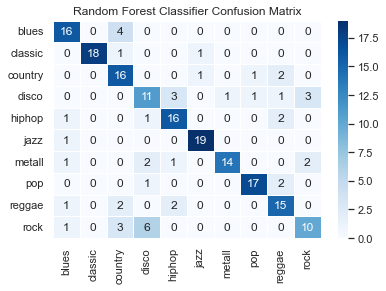

In [63]:
# Printing confusion matrix
print('True classes in rows, predictions in columns')
axes = sns.heatmap(confusion_df, annot=True, linewidths=.5, cmap='Blues')
plt.title('Random Forest Classifier Confusion Matrix')
plt.show()

#### Save the final model to project model folder

In [64]:
# Saving model to file.
estimator_name = 'final_rf_clf'
model = final_rf_clf
name = experiment_id + estimator_name + '.pkl'
filename = os.path.join(MODELS_PATH,name)
pickle.dump(model, open(filename, 'wb'))
print(f'Model {estimator_name} saved to file {name} in model folder.')

Model final_rf_clf saved to file exp01_final_rf_clf.pkl in model folder.


<a href = '#Introduction'>Back to Introduction</a>


### 5.2.2 K Nearest Neighbor Model


#### Optimising classifier on accuracy with gridsearch crossvalidation

In [65]:
knn_clf = KNeighborsClassifier()

In [66]:
param_grid = { 
    'n_neighbors': [1,3,5,7,9,11],
    'weights': ['uniform', 'distance'],
    'leaf_size': ['30','20','10','5','2']
}

In [67]:
start = time.time()

In [68]:
# Searhing best hyperparameter set that provide best estimator (classifier) accuracy
HPO_grid_Search_knn = GridSearchCV(estimator=knn_clf, param_grid=param_grid,
                                   cv= strf_kfold,return_train_score=True, verbose=3,
                                   scoring='accuracy', error_score='raise')
HPO_grid_Search_knn.fit(X_training_scaled, y_training)

Fitting 10 folds for each of 60 candidates, totalling 600 fits
[CV 1/10] END leaf_size=30, n_neighbors=1, weights=uniform;, score=(train=1.000, test=0.650) total time=   0.0s
[CV 2/10] END leaf_size=30, n_neighbors=1, weights=uniform;, score=(train=1.000, test=0.650) total time=   0.0s
[CV 3/10] END leaf_size=30, n_neighbors=1, weights=uniform;, score=(train=1.000, test=0.650) total time=   0.0s
[CV 4/10] END leaf_size=30, n_neighbors=1, weights=uniform;, score=(train=1.000, test=0.617) total time=   0.0s
[CV 5/10] END leaf_size=30, n_neighbors=1, weights=uniform;, score=(train=1.000, test=0.517) total time=   0.0s
[CV 6/10] END leaf_size=30, n_neighbors=1, weights=uniform;, score=(train=1.000, test=0.600) total time=   0.0s
[CV 7/10] END leaf_size=30, n_neighbors=1, weights=uniform;, score=(train=1.000, test=0.683) total time=   0.0s
[CV 8/10] END leaf_size=30, n_neighbors=1, weights=uniform;, score=(train=1.000, test=0.533) total time=   0.0s
[CV 9/10] END leaf_size=30, n_neighbors=1

[CV 7/10] END leaf_size=30, n_neighbors=7, weights=distance;, score=(train=1.000, test=0.667) total time=   0.0s
[CV 8/10] END leaf_size=30, n_neighbors=7, weights=distance;, score=(train=1.000, test=0.600) total time=   0.0s
[CV 9/10] END leaf_size=30, n_neighbors=7, weights=distance;, score=(train=1.000, test=0.683) total time=   0.0s
[CV 10/10] END leaf_size=30, n_neighbors=7, weights=distance;, score=(train=1.000, test=0.600) total time=   0.0s
[CV 1/10] END leaf_size=30, n_neighbors=9, weights=uniform;, score=(train=0.700, test=0.633) total time=   0.0s
[CV 2/10] END leaf_size=30, n_neighbors=9, weights=uniform;, score=(train=0.719, test=0.583) total time=   0.0s
[CV 3/10] END leaf_size=30, n_neighbors=9, weights=uniform;, score=(train=0.728, test=0.700) total time=   0.0s
[CV 4/10] END leaf_size=30, n_neighbors=9, weights=uniform;, score=(train=0.715, test=0.633) total time=   0.0s
[CV 5/10] END leaf_size=30, n_neighbors=9, weights=uniform;, score=(train=0.731, test=0.567) total 

[CV 2/10] END leaf_size=20, n_neighbors=3, weights=distance;, score=(train=1.000, test=0.650) total time=   0.0s
[CV 3/10] END leaf_size=20, n_neighbors=3, weights=distance;, score=(train=1.000, test=0.667) total time=   0.0s
[CV 4/10] END leaf_size=20, n_neighbors=3, weights=distance;, score=(train=1.000, test=0.733) total time=   0.0s
[CV 5/10] END leaf_size=20, n_neighbors=3, weights=distance;, score=(train=1.000, test=0.567) total time=   0.0s
[CV 6/10] END leaf_size=20, n_neighbors=3, weights=distance;, score=(train=1.000, test=0.567) total time=   0.0s
[CV 7/10] END leaf_size=20, n_neighbors=3, weights=distance;, score=(train=1.000, test=0.683) total time=   0.0s
[CV 8/10] END leaf_size=20, n_neighbors=3, weights=distance;, score=(train=1.000, test=0.550) total time=   0.0s
[CV 9/10] END leaf_size=20, n_neighbors=3, weights=distance;, score=(train=1.000, test=0.667) total time=   0.0s
[CV 10/10] END leaf_size=20, n_neighbors=3, weights=distance;, score=(train=1.000, test=0.583) t

[CV 6/10] END leaf_size=20, n_neighbors=11, weights=uniform;, score=(train=0.709, test=0.533) total time=   0.0s
[CV 7/10] END leaf_size=20, n_neighbors=11, weights=uniform;, score=(train=0.706, test=0.617) total time=   0.0s
[CV 8/10] END leaf_size=20, n_neighbors=11, weights=uniform;, score=(train=0.713, test=0.600) total time=   0.0s
[CV 9/10] END leaf_size=20, n_neighbors=11, weights=uniform;, score=(train=0.693, test=0.583) total time=   0.0s
[CV 10/10] END leaf_size=20, n_neighbors=11, weights=uniform;, score=(train=0.711, test=0.600) total time=   0.0s
[CV 1/10] END leaf_size=20, n_neighbors=11, weights=distance;, score=(train=1.000, test=0.667) total time=   0.0s
[CV 2/10] END leaf_size=20, n_neighbors=11, weights=distance;, score=(train=1.000, test=0.633) total time=   0.0s
[CV 3/10] END leaf_size=20, n_neighbors=11, weights=distance;, score=(train=1.000, test=0.700) total time=   0.0s
[CV 4/10] END leaf_size=20, n_neighbors=11, weights=distance;, score=(train=1.000, test=0.70

[CV 3/10] END leaf_size=10, n_neighbors=7, weights=uniform;, score=(train=0.752, test=0.700) total time=   0.0s
[CV 4/10] END leaf_size=10, n_neighbors=7, weights=uniform;, score=(train=0.735, test=0.650) total time=   0.0s
[CV 5/10] END leaf_size=10, n_neighbors=7, weights=uniform;, score=(train=0.752, test=0.500) total time=   0.0s
[CV 6/10] END leaf_size=10, n_neighbors=7, weights=uniform;, score=(train=0.743, test=0.567) total time=   0.0s
[CV 7/10] END leaf_size=10, n_neighbors=7, weights=uniform;, score=(train=0.752, test=0.650) total time=   0.0s
[CV 8/10] END leaf_size=10, n_neighbors=7, weights=uniform;, score=(train=0.731, test=0.650) total time=   0.0s
[CV 9/10] END leaf_size=10, n_neighbors=7, weights=uniform;, score=(train=0.730, test=0.650) total time=   0.0s
[CV 10/10] END leaf_size=10, n_neighbors=7, weights=uniform;, score=(train=0.744, test=0.583) total time=   0.0s
[CV 1/10] END leaf_size=10, n_neighbors=7, weights=distance;, score=(train=1.000, test=0.617) total tim

[CV 2/10] END leaf_size=5, n_neighbors=3, weights=uniform;, score=(train=0.789, test=0.667) total time=   0.0s
[CV 3/10] END leaf_size=5, n_neighbors=3, weights=uniform;, score=(train=0.809, test=0.600) total time=   0.0s
[CV 4/10] END leaf_size=5, n_neighbors=3, weights=uniform;, score=(train=0.778, test=0.700) total time=   0.0s
[CV 5/10] END leaf_size=5, n_neighbors=3, weights=uniform;, score=(train=0.820, test=0.600) total time=   0.0s
[CV 6/10] END leaf_size=5, n_neighbors=3, weights=uniform;, score=(train=0.806, test=0.567) total time=   0.0s
[CV 7/10] END leaf_size=5, n_neighbors=3, weights=uniform;, score=(train=0.804, test=0.683) total time=   0.0s
[CV 8/10] END leaf_size=5, n_neighbors=3, weights=uniform;, score=(train=0.807, test=0.567) total time=   0.0s
[CV 9/10] END leaf_size=5, n_neighbors=3, weights=uniform;, score=(train=0.798, test=0.633) total time=   0.0s
[CV 10/10] END leaf_size=5, n_neighbors=3, weights=uniform;, score=(train=0.791, test=0.583) total time=   0.0s


[CV 6/10] END leaf_size=5, n_neighbors=9, weights=distance;, score=(train=1.000, test=0.583) total time=   0.0s
[CV 7/10] END leaf_size=5, n_neighbors=9, weights=distance;, score=(train=1.000, test=0.633) total time=   0.0s
[CV 8/10] END leaf_size=5, n_neighbors=9, weights=distance;, score=(train=1.000, test=0.600) total time=   0.0s
[CV 9/10] END leaf_size=5, n_neighbors=9, weights=distance;, score=(train=1.000, test=0.733) total time=   0.0s
[CV 10/10] END leaf_size=5, n_neighbors=9, weights=distance;, score=(train=1.000, test=0.633) total time=   0.0s
[CV 1/10] END leaf_size=5, n_neighbors=11, weights=uniform;, score=(train=0.702, test=0.633) total time=   0.0s
[CV 2/10] END leaf_size=5, n_neighbors=11, weights=uniform;, score=(train=0.717, test=0.617) total time=   0.0s
[CV 3/10] END leaf_size=5, n_neighbors=11, weights=uniform;, score=(train=0.711, test=0.700) total time=   0.0s
[CV 4/10] END leaf_size=5, n_neighbors=11, weights=uniform;, score=(train=0.706, test=0.683) total time

[CV 10/10] END leaf_size=2, n_neighbors=5, weights=uniform;, score=(train=0.754, test=0.583) total time=   0.0s
[CV 1/10] END leaf_size=2, n_neighbors=5, weights=distance;, score=(train=1.000, test=0.667) total time=   0.0s
[CV 2/10] END leaf_size=2, n_neighbors=5, weights=distance;, score=(train=1.000, test=0.683) total time=   0.0s
[CV 3/10] END leaf_size=2, n_neighbors=5, weights=distance;, score=(train=1.000, test=0.650) total time=   0.0s
[CV 4/10] END leaf_size=2, n_neighbors=5, weights=distance;, score=(train=1.000, test=0.700) total time=   0.0s
[CV 5/10] END leaf_size=2, n_neighbors=5, weights=distance;, score=(train=1.000, test=0.567) total time=   0.0s
[CV 6/10] END leaf_size=2, n_neighbors=5, weights=distance;, score=(train=1.000, test=0.567) total time=   0.0s
[CV 7/10] END leaf_size=2, n_neighbors=5, weights=distance;, score=(train=1.000, test=0.683) total time=   0.0s
[CV 8/10] END leaf_size=2, n_neighbors=5, weights=distance;, score=(train=1.000, test=0.633) total time=

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=54, shuffle=True),
             error_score='raise', estimator=KNeighborsClassifier(),
             param_grid={'leaf_size': ['30', '20', '10', '5', '2'],
                         'n_neighbors': [1, 3, 5, 7, 9, 11],
                         'weights': ['uniform', 'distance']},
             return_train_score=True, scoring='accuracy', verbose=3)

In [69]:
end = time.time()
print(f'Time for optimising hyperparameters: {end - start} seconds')

Time for optimising hyperparameters: 22.301000833511353 seconds


#### HPO results

In [70]:
HPO_grid_Search_knn_results = HPO_grid_Search_knn.cv_results_
print(HPO_grid_Search_knn_results)

{'mean_fit_time': array([0.00055828, 0.00201917, 0.0042465 , 0.00304008, 0.00142043,
       0.00121899, 0.00303111, 0.00423086, 0.00241077, 0.0022315 ,
       0.00261345, 0.0039279 , 0.0024327 , 0.00230448, 0.00208004,
       0.00316689, 0.00347424, 0.00444968, 0.00359476, 0.00322497,
       0.00400889, 0.00302911, 0.00252221, 0.00385802, 0.00080738,
       0.0048559 , 0.00121722, 0.00184078, 0.00261676, 0.00416434,
       0.00122406, 0.00102012, 0.00203319, 0.00141542, 0.0012085 ,
       0.0020261 , 0.00362542, 0.00067003, 0.00262215, 0.00261495,
       0.0042387 , 0.00201421, 0.00122983, 0.0054724 , 0.00243223,
       0.0024204 , 0.00309672, 0.00187185, 0.00435536, 0.0029644 ,
       0.00146689, 0.00386875, 0.00378346, 0.00222385, 0.00222797,
       0.00357676, 0.00281856, 0.00343947, 0.00222487, 0.00281219]), 'std_fit_time': array([0.00086275, 0.00311352, 0.0040734 , 0.00426574, 0.002385  ,
       0.00241571, 0.00340007, 0.00385769, 0.00368252, 0.00304922,
       0.00360064, 0.00363

In [71]:
print('Best estimator is:', HPO_grid_Search_knn.best_estimator_)

Best estimator is: KNeighborsClassifier(leaf_size='30', n_neighbors=9, weights='distance')


In [72]:
print('Best set of parameters found on gridseach using crossvalidation:')
print(HPO_grid_Search_knn.best_params_)

Best set of parameters found on gridseach using crossvalidation:
{'leaf_size': '30', 'n_neighbors': 9, 'weights': 'distance'}


In [73]:
print('Mean cross-validated score of the best estimator: ',HPO_grid_Search_knn.best_score_)

Mean cross-validated score of the best estimator:  0.6433333333333333


In [74]:
print("Grid scores on (X_training_scaled, y_training) sets:")
print()
means = HPO_grid_Search_knn.cv_results_["mean_test_score"]
stds = HPO_grid_Search_knn.cv_results_["std_test_score"]

for mean, std, params in zip(means, stds, HPO_grid_Search_knn.cv_results_["params"]):
    print("%0.3f (+/-%0.03f) for %r" % (mean, 2 * std, params))
    print()


Grid scores on (X_training_scaled, y_training) sets:

0.615 (+/-0.113) for {'leaf_size': '30', 'n_neighbors': 1, 'weights': 'uniform'}

0.615 (+/-0.113) for {'leaf_size': '30', 'n_neighbors': 1, 'weights': 'distance'}

0.622 (+/-0.091) for {'leaf_size': '30', 'n_neighbors': 3, 'weights': 'uniform'}

0.635 (+/-0.120) for {'leaf_size': '30', 'n_neighbors': 3, 'weights': 'distance'}

0.610 (+/-0.088) for {'leaf_size': '30', 'n_neighbors': 5, 'weights': 'uniform'}

0.637 (+/-0.099) for {'leaf_size': '30', 'n_neighbors': 5, 'weights': 'distance'}

0.623 (+/-0.111) for {'leaf_size': '30', 'n_neighbors': 7, 'weights': 'uniform'}

0.628 (+/-0.112) for {'leaf_size': '30', 'n_neighbors': 7, 'weights': 'distance'}

0.612 (+/-0.100) for {'leaf_size': '30', 'n_neighbors': 9, 'weights': 'uniform'}

0.643 (+/-0.100) for {'leaf_size': '30', 'n_neighbors': 9, 'weights': 'distance'}

0.612 (+/-0.099) for {'leaf_size': '30', 'n_neighbors': 11, 'weights': 'uniform'}

0.625 (+/-0.105) for {'leaf_size': '30

#### Let us see how this hyperparameter optimised model performs on validation set it has not seen before

In [75]:
predicted = HPO_grid_Search_knn.best_estimator_.predict(X_val_scaled)
expected = y_val

In [76]:
# Printing metrics report
classes = ['blues','classic','country','disco','hiphop','jazz','metall','pop','reggae','rock']
print(classification_report(expected, predicted, target_names=classes, digits=4))

              precision    recall  f1-score   support

       blues     0.9000    0.4500    0.6000        20
     classic     0.8947    0.8500    0.8718        20
     country     0.5185    0.7000    0.5957        20
       disco     0.4800    0.6000    0.5333        20
      hiphop     0.6818    0.7500    0.7143        20
        jazz     0.7368    0.7000    0.7179        20
      metall     0.8889    0.8000    0.8421        20
         pop     0.6667    0.9000    0.7660        20
      reggae     0.6923    0.4500    0.5455        20
        rock     0.4500    0.4500    0.4500        20

    accuracy                         0.6650       200
   macro avg     0.6910    0.6650    0.6637       200
weighted avg     0.6910    0.6650    0.6637       200



Model's ability to generalize decreases if accuracy on validation set is much less than accurcy of training set. That indicates overfitted model. -> Reguires simplification or regulation or less noisy feature data or more data.    

This model performed ok on the validation set when comparing to cross-validated accuracy calculated during hpo.

#### Then it is time to train this model on the larger main train set X_train_scaled

In [77]:
# train the best model with train set
final_knn_clf = HPO_grid_Search_knn.best_estimator_
final_knn_clf.fit(X_train_scaled, y_train)

KNeighborsClassifier(leaf_size='30', n_neighbors=9, weights='distance')

#### And finally test how it performs on predicting the ultimate test set which was separated early and is new to the model and the exploration process.

In [78]:
# predicting
start = time.time()
predicted = final_knn_clf.predict(X=X_test_scaled)
end = time.time()
expected = y_test
print(f'Time elapsed on predicting the test set: {end - start} sec')

Time elapsed on predicting the test set: 0.01109457015991211 sec


In [79]:
target_classes = ['blues','classic','country','disco','hiphop','jazz','metall','pop','reggae','rock']
print('KNN Klassifier Classification Report')
print(classification_report(expected, predicted, target_names=target_classes, digits=4))

KNN Klassifier Classification Report
              precision    recall  f1-score   support

       blues     0.6190    0.6500    0.6341        20
     classic     1.0000    0.8500    0.9189        20
     country     0.5333    0.8000    0.6400        20
       disco     0.5714    0.6000    0.5854        20
      hiphop     0.8000    0.6000    0.6857        20
        jazz     0.8571    0.6000    0.7059        20
      metall     1.0000    0.6500    0.7879        20
         pop     0.7083    0.8500    0.7727        20
      reggae     0.5000    0.6500    0.5652        20
        rock     0.5263    0.5000    0.5128        20

    accuracy                         0.6750       200
   macro avg     0.7116    0.6750    0.6809       200
weighted avg     0.7116    0.6750    0.6809       200



In [80]:
# Calculating confusion matrix
confusion = confusion_matrix(y_true=expected, y_pred=predicted)
classes_pdser = pd.Series(['blues','classic','country','disco','hiphop','jazz','metall','pop','reggae','rock'])
confusion_df = pd.DataFrame(confusion, index=classes_pdser, columns=classes_pdser)

True classes in rows, predictions in columns


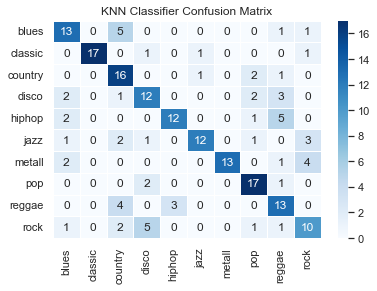

In [81]:
# Printing confusion matrix
print('True classes in rows, predictions in columns')
axes = sns.heatmap(confusion_df, annot=True, linewidths=.5, cmap='Blues')
plt.title('KNN Classifier Confusion Matrix')
plt.show()

#### Save the final model to project model folder

In [82]:
# Saving model to file.
estimator_name = 'final_knn_clf'
model = final_knn_clf
name = experiment_id + estimator_name + '.pkl'
filename = os.path.join(MODELS_PATH,name)
pickle.dump(model, open(filename, 'wb'))
print(f'Model {estimator_name} saved to file {name} in model folder.')

Model final_knn_clf saved to file exp01_final_knn_clf.pkl in model folder.


In [83]:
# checking the effect of k for knn estimator

for k in range(1,30,2):

    strf_kfold = StratifiedKFold(n_splits=10, random_state=54, shuffle=True) # creating cross validation iterator
    tmp_knn_clf = KNeighborsClassifier(n_neighbors=k, weights='distance', algorithm='kd_tree')
    scores = cross_val_score(tmp_knn_clf,X_training_scaled,y_training, cv=strf_kfold)
    print(f'k={k:<4}, mean accuracy={scores.mean():.2%}, ' + 
          f'standard deviation={scores.std():.2%}')
       

k=1   , mean accuracy=61.50%, standard deviation=5.65%
k=3   , mean accuracy=63.50%, standard deviation=5.98%
k=5   , mean accuracy=63.67%, standard deviation=4.93%
k=7   , mean accuracy=62.83%, standard deviation=5.58%
k=9   , mean accuracy=64.33%, standard deviation=5.01%
k=11  , mean accuracy=62.50%, standard deviation=5.23%
k=13  , mean accuracy=63.50%, standard deviation=5.60%
k=15  , mean accuracy=61.33%, standard deviation=5.62%
k=17  , mean accuracy=62.83%, standard deviation=5.38%
k=19  , mean accuracy=61.00%, standard deviation=6.46%
k=21  , mean accuracy=59.83%, standard deviation=5.55%
k=23  , mean accuracy=58.33%, standard deviation=4.65%
k=25  , mean accuracy=58.67%, standard deviation=4.93%
k=27  , mean accuracy=57.67%, standard deviation=6.67%
k=29  , mean accuracy=57.50%, standard deviation=6.68%


<a href = '#Introduction'>Back to Introduction</a>


### 5.2.3 Logistic Regression Model


#### Optimising classifier on accuracy with gridsearch crossvalidation

In [84]:
log_clf = LogisticRegression(solver="lbfgs", max_iter=500)

In [85]:
param_grid = { 
    'penalty': ['l2'],
    'dual': [False],
    'C' : [0.1,0.2,0.3,0.4,0.5, 1.0, 1.5, 2.0, 4.0],
    'solver' :['newton-cg'],
    'max_iter': [100, 200, 500],
    'multi_class': ['auto', 'ovr', 'multinomial']
}

In [86]:
start = time.time()

In [87]:
# Searhing best hyperparameter set that provide best estimator (classifier) accuracy
HPO_grid_Search_log = GridSearchCV(estimator=log_clf, param_grid=param_grid, cv= strf_kfold)
HPO_grid_Search_log.fit(X_training_scaled, y_training)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=54, shuffle=True),
             estimator=LogisticRegression(max_iter=500),
             param_grid={'C': [0.1, 0.2, 0.3, 0.4, 0.5, 1.0, 1.5, 2.0, 4.0],
                         'dual': [False], 'max_iter': [100, 200, 500],
                         'multi_class': ['auto', 'ovr', 'multinomial'],
                         'penalty': ['l2'], 'solver': ['newton-cg']})

In [88]:
end = time.time()
print(f'Time for optimising hyperparameters: {end - start} seconds')

Time for optimising hyperparameters: 187.49045610427856 seconds


#### HPO results

In [89]:
HPO_grid_Search_log_results = HPO_grid_Search_log.cv_results_
print(HPO_grid_Search_log_results)

{'mean_fit_time': array([0.09920466, 0.30062943, 0.15165534, 0.12346866, 0.26898856,
       0.11152408, 0.12234769, 0.80773554, 0.22478135, 0.17425411,
       0.32950716, 0.17530093, 0.13226187, 0.27569547, 0.11535656,
       0.10927224, 0.27383475, 0.13041391, 0.12223337, 0.26958706,
       0.17288115, 0.15496945, 0.26619761, 0.14439328, 0.16634037,
       0.35096095, 0.10662193, 0.10200486, 0.4257797 , 0.16149251,
       0.17943377, 0.39458385, 0.18559997, 0.13527284, 0.25148821,
       0.16178656, 0.14964104, 0.32016079, 0.1223479 , 0.12657998,
       0.29244785, 0.14458694, 0.12617106, 0.32679372, 0.1456063 ,
       0.15442948, 0.39144101, 0.19653811, 0.17667849, 0.37195015,
       0.24459674, 0.21764762, 0.39877722, 0.20453289, 0.15622151,
       0.30746806, 0.22179954, 0.19228833, 0.32572942, 0.19466798,
       0.16148896, 0.26242568, 0.14222095, 0.21300566, 0.30127947,
       0.15103467, 0.15603817, 0.26805861, 0.18014681, 0.26100338,
       0.46137946, 0.23325469, 0.26822739, 0

In [90]:
print('Best estimator is:', HPO_grid_Search_log.best_estimator_)

Best estimator is: LogisticRegression(C=0.3, solver='newton-cg')


In [91]:
print('Best set of parameters found on gridseach using crossvalidation:')
print(HPO_grid_Search_log.best_params_)

Best set of parameters found on gridseach using crossvalidation:
{'C': 0.3, 'dual': False, 'max_iter': 100, 'multi_class': 'auto', 'penalty': 'l2', 'solver': 'newton-cg'}


In [92]:
print('Mean cross-validated score of the best estimator: ',HPO_grid_Search_log.best_score_)

Mean cross-validated score of the best estimator:  0.6883333333333334


In [93]:
print("Grid scores on (X_training_scaled, y_training) sets:")
print()
means = HPO_grid_Search_log.cv_results_["mean_test_score"]
stds = HPO_grid_Search_log.cv_results_["std_test_score"]

for mean, std, params in zip(means, stds, HPO_grid_Search_log.cv_results_["params"]):
    print(f'mean accuracy %0.2f (+/-%0.02f) for \n %r \n' % (mean, 2 * std, params))
    print()
    

Grid scores on (X_training_scaled, y_training) sets:

mean accuracy 0.68 (+/-0.12) for 
 {'C': 0.1, 'dual': False, 'max_iter': 100, 'multi_class': 'auto', 'penalty': 'l2', 'solver': 'newton-cg'} 


mean accuracy 0.67 (+/-0.10) for 
 {'C': 0.1, 'dual': False, 'max_iter': 100, 'multi_class': 'ovr', 'penalty': 'l2', 'solver': 'newton-cg'} 


mean accuracy 0.68 (+/-0.12) for 
 {'C': 0.1, 'dual': False, 'max_iter': 100, 'multi_class': 'multinomial', 'penalty': 'l2', 'solver': 'newton-cg'} 


mean accuracy 0.68 (+/-0.12) for 
 {'C': 0.1, 'dual': False, 'max_iter': 200, 'multi_class': 'auto', 'penalty': 'l2', 'solver': 'newton-cg'} 


mean accuracy 0.67 (+/-0.10) for 
 {'C': 0.1, 'dual': False, 'max_iter': 200, 'multi_class': 'ovr', 'penalty': 'l2', 'solver': 'newton-cg'} 


mean accuracy 0.68 (+/-0.12) for 
 {'C': 0.1, 'dual': False, 'max_iter': 200, 'multi_class': 'multinomial', 'penalty': 'l2', 'solver': 'newton-cg'} 


mean accuracy 0.68 (+/-0.12) for 
 {'C': 0.1, 'dual': False, 'max_iter

#### Let us see how this hyperparameter optimised model performs on validation set it has not seen before

In [94]:
predicted = HPO_grid_Search_log.best_estimator_.predict(X_val_scaled)
expected = y_val

In [95]:
# Printing metrics report
classes = ['blues','classic','country','disco','hiphop','jazz','metall','pop','reggae','rock']
print('Classifier tested against unseen validation set.')
print('Classificationreport of HPO Logistic Recression Classifier on unseen validation data:')
print()
print(classification_report(expected, predicted, target_names=classes, digits=4))

Classifier tested against unseen validation set.
Classificationreport of HPO Logistic Recression Classifier on unseen validation data:

              precision    recall  f1-score   support

       blues     0.7692    0.5000    0.6061        20
     classic     0.9048    0.9500    0.9268        20
     country     0.7000    0.7000    0.7000        20
       disco     0.5625    0.4500    0.5000        20
      hiphop     0.7000    0.7000    0.7000        20
        jazz     0.8889    0.8000    0.8421        20
      metall     0.7917    0.9500    0.8636        20
         pop     0.8421    0.8000    0.8205        20
      reggae     0.6667    0.8000    0.7273        20
        rock     0.5200    0.6500    0.5778        20

    accuracy                         0.7300       200
   macro avg     0.7346    0.7300    0.7264       200
weighted avg     0.7346    0.7300    0.7264       200



Model's ability to generalize decreases if accuracy on validation set is much less than accurcy of training set. That indicates overfitted model. -> Reguires simplification or regulation or less noisy feature data or more data.    

This model performed ok on the validation set when comparing to cross-validated accuracy calculated during hpo.

#### Then it is time to train this model on the larger main train set (X_train_scaled, y_train)

In [96]:
# train the best model with train set
final_log_clf = HPO_grid_Search_log.best_estimator_
final_log_clf.fit(X_train_scaled, y_train)

LogisticRegression(C=0.3, solver='newton-cg')

#### And finally test how it performs on predicting the ultimate test set which was separated early and is new to the model and the exploration process.

In [97]:
# predicting
start = time.time()
predicted = final_log_clf.predict(X=X_test_scaled)
end = time.time()
expected = y_test
print(f'Time elapsed on predicting the test set: {end - start} sec')

Time elapsed on predicting the test set: 0.001390695571899414 sec


In [98]:
target_classes = ['blues','classic','country','disco','hiphop','jazz','metall','pop','reggae','rock']
print('Classifier tested against unseen test set.')
print('Classificationreport of final Logistic Regression Classifier on unseen test data:')
print()
print(classification_report(expected, predicted, target_names=target_classes, digits=4))

Classifier tested against unseen test set.
Classificationreport of final Logistic Regression Classifier on unseen test data:

              precision    recall  f1-score   support

       blues     0.5926    0.8000    0.6809        20
     classic     1.0000    0.9500    0.9744        20
     country     0.8333    0.7500    0.7895        20
       disco     0.8500    0.8500    0.8500        20
      hiphop     0.6667    0.6000    0.6316        20
        jazz     0.8947    0.8500    0.8718        20
      metall     1.0000    0.7000    0.8235        20
         pop     0.8182    0.9000    0.8571        20
      reggae     0.5926    0.8000    0.6809        20
        rock     0.6875    0.5500    0.6111        20

    accuracy                         0.7750       200
   macro avg     0.7936    0.7750    0.7771       200
weighted avg     0.7936    0.7750    0.7771       200



In [99]:
# Calculating confusion matrix
confusion = confusion_matrix(y_true=expected, y_pred=predicted)
classes_pdser = pd.Series(['blues','classic','country','disco','hiphop','jazz','metall','pop','reggae','rock'])
confusion_df = pd.DataFrame(confusion, index=classes_pdser, columns=classes_pdser)

True classes in rows, predictions in columns


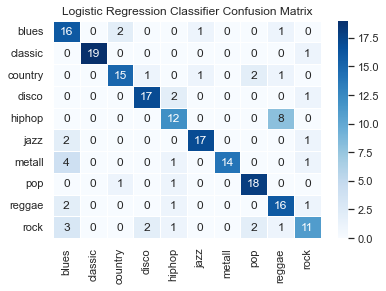

In [100]:
# Printing confusion matrix
print('True classes in rows, predictions in columns')
axes = sns.heatmap(confusion_df, annot=True, linewidths=.5, cmap='Blues')
plt.title('Logistic Regression Classifier Confusion Matrix')
plt.show()

#### Save the final model to project model folder

In [101]:
# Saving model to file.
estimator_name = 'final_log_clf'
model = final_log_clf
name = experiment_id + estimator_name + '.pkl'
filename = os.path.join(MODELS_PATH,name)
pickle.dump(model, open(filename, 'wb'))
print(f'Model {estimator_name} saved to file {name} in model folder.')

Model final_log_clf saved to file exp01_final_log_clf.pkl in model folder.


<a href = '#Introduction'>Back to Introduction</a>


### 5.2.4 Support Vector Machine Model


#### Optimising classifier on accuracy with gridsearch crossvalidation

In [102]:
svm_clf = SVC()

In [103]:
# ovo preferred
param_grid = { 
    'C': [7.5, 8.0, 9.0, 9.5, 9.6, 9.7, 9.8, 9.9, 10.0, 10.1, 10.2, 10.5, 11.0],
    'kernel': ['rbf','poly'],
    'degree' : [2, 3, 4],
    'gamma' : ['scale','auto'],
    #'shrinking': ['True'],
    #'probability': ['False'],
    'tol': [0.001, 0.0001, 0.0002],
    'cache_size': [1000],
    'max_iter': [-1],
    #'decision_function_shape': ['ovo'],
    'random_state': [4]
}

In [104]:
start = time.time()

In [105]:
# Searhing best hyperparameter set that provide best estimator (classifier) accuracy
HPO_grid_search_svm = GridSearchCV(estimator=svm_clf, param_grid=param_grid, cv= strf_kfold)
HPO_grid_search_svm.fit(X_training_scaled, y_training)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=54, shuffle=True),
             estimator=SVC(),
             param_grid={'C': [7.5, 8.0, 9.0, 9.5, 9.6, 9.7, 9.8, 9.9, 10.0,
                               10.1, 10.2, 10.5, 11.0],
                         'cache_size': [1000], 'degree': [2, 3, 4],
                         'gamma': ['scale', 'auto'], 'kernel': ['rbf', 'poly'],
                         'max_iter': [-1], 'random_state': [4],
                         'tol': [0.001, 0.0001, 0.0002]})

In [106]:
end = time.time()
print(f'Time for optimising hyperparameters: {end - start} seconds')

Time for optimising hyperparameters: 212.1240589618683 seconds


#### HPO results

In [107]:
HPO_grid_search_svm_results = HPO_grid_search_svm.cv_results_
print(HPO_grid_search_svm_results)

{'mean_fit_time': array([0.06844127, 0.05399702, 0.06530783, 0.05558629, 0.05162585,
       0.05916142, 0.06010053, 0.06603601, 0.04870477, 0.04239888,
       0.04695718, 0.03523009, 0.04245925, 0.03890357, 0.03955274,
       0.02961614, 0.02777193, 0.02681158, 0.03038511, 0.03281205,
       0.03932605, 0.02352061, 0.03025577, 0.02965181, 0.03490794,
       0.03750284, 0.05213006, 0.06260142, 0.04800658, 0.04524355,
       0.03508222, 0.03755381, 0.03513763, 0.04828014, 0.04852486,
       0.03961248, 0.03383062, 0.03972807, 0.03730218, 0.03254793,
       0.03495281, 0.03074455, 0.03452744, 0.03847754, 0.0325042 ,
       0.03444216, 0.03330488, 0.03105445, 0.03244786, 0.03553331,
       0.0369514 , 0.02578285, 0.02647352, 0.03868763, 0.04190667,
       0.03940473, 0.03690593, 0.03141034, 0.02988272, 0.04299893,
       0.0467247 , 0.04083674, 0.03742757, 0.04346938, 0.06366513,
       0.05266831, 0.04089582, 0.03724937, 0.04097745, 0.04371021,
       0.0434602 , 0.04070482, 0.04319811, 0

In [108]:
print('Best estimator is:', HPO_grid_search_svm.best_estimator_)

Best estimator is: SVC(C=9.0, cache_size=1000, degree=2, gamma='auto', random_state=4)


In [109]:
print('Best set of parameters found on gridseach using crossvalidation:')
print(HPO_grid_search_svm.best_params_)

Best set of parameters found on gridseach using crossvalidation:
{'C': 9.0, 'cache_size': 1000, 'degree': 2, 'gamma': 'auto', 'kernel': 'rbf', 'max_iter': -1, 'random_state': 4, 'tol': 0.001}


In [110]:
print('Mean cross-validated score of the best estimator: ',HPO_grid_search_svm.best_score_)

Mean cross-validated score of the best estimator:  0.69


In [111]:
print("Grid scores on (X_training_scaled, y_training) sets:")
print()
means = HPO_grid_search_svm.cv_results_["mean_test_score"]
stds = HPO_grid_search_svm.cv_results_["std_test_score"]

for mean, std, params in zip(means, stds, HPO_grid_search_svm.cv_results_["params"]):
    print("%0.3f (+/-%0.03f) for %r" % (mean, 2 * std, params))
    print()
    

Grid scores on (X_training_scaled, y_training) sets:

0.683 (+/-0.091) for {'C': 7.5, 'cache_size': 1000, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'random_state': 4, 'tol': 0.001}

0.683 (+/-0.091) for {'C': 7.5, 'cache_size': 1000, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'random_state': 4, 'tol': 0.0001}

0.683 (+/-0.091) for {'C': 7.5, 'cache_size': 1000, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'random_state': 4, 'tol': 0.0002}

0.630 (+/-0.122) for {'C': 7.5, 'cache_size': 1000, 'degree': 2, 'gamma': 'scale', 'kernel': 'poly', 'max_iter': -1, 'random_state': 4, 'tol': 0.001}

0.630 (+/-0.122) for {'C': 7.5, 'cache_size': 1000, 'degree': 2, 'gamma': 'scale', 'kernel': 'poly', 'max_iter': -1, 'random_state': 4, 'tol': 0.0001}

0.630 (+/-0.122) for {'C': 7.5, 'cache_size': 1000, 'degree': 2, 'gamma': 'scale', 'kernel': 'poly', 'max_iter': -1, 'random_state': 4, 'tol': 0.0002}

0.685 (+/-0.090) for {'C': 7.5, 'cache_

#### Let us see how this hyperparameter optimised model performs on validation set it has not seen before

In [112]:
predicted = HPO_grid_search_svm.best_estimator_.predict(X_val_scaled)
expected = y_val

In [113]:
# Printing metrics report
classes = ['blues','classic','country','disco','hiphop','jazz','metall','pop','reggae','rock']
print('Classifier tested against unseen validation set.')
print('Classificationreport of HPO Support Vector Machine Classifier on unseen validation data:')
print()
print(classification_report(expected, predicted, target_names=classes, digits=4))

Classifier tested against unseen validation set.
Classificationreport of HPO Support Vector Machine Classifier on unseen validation data:

              precision    recall  f1-score   support

       blues     0.9333    0.7000    0.8000        20
     classic     0.9444    0.8500    0.8947        20
     country     0.6667    0.7000    0.6829        20
       disco     0.5625    0.4500    0.5000        20
      hiphop     0.7273    0.8000    0.7619        20
        jazz     0.7826    0.9000    0.8372        20
      metall     0.8261    0.9500    0.8837        20
         pop     0.7500    0.7500    0.7500        20
      reggae     0.6842    0.6500    0.6667        20
        rock     0.6957    0.8000    0.7442        20

    accuracy                         0.7550       200
   macro avg     0.7573    0.7550    0.7521       200
weighted avg     0.7573    0.7550    0.7521       200



Model's ability to generalize decreases if accuracy on validation set is much less than accurcy of training set. That indicates overfitted model. -> Reguires simplification or regulation or less noisy feature data or more data.    

This model performed ok on the validation set when comparing to cross-validated accuracy calculated during hpo.

#### Then it is time to train this model on the larger main train set (X_train_scaled, y_train)

In [114]:
final_svm_clf = HPO_grid_search_svm.best_estimator_
final_svm_clf.fit(X_train_scaled, y_train)

SVC(C=9.0, cache_size=1000, degree=2, gamma='auto', random_state=4)

#### And finally test how it performs on predicting the ultimate test set which was separated early and is new to the model and the exploration process.

In [115]:
# predicting
start = time.time()
predicted = final_svm_clf.predict(X=X_test_scaled)
end = time.time()
expected = y_test
print(f'Time elapsed on predicting the test set: {end - start} sec')

Time elapsed on predicting the test set: 0.02264857292175293 sec


In [116]:
target_classes = ['blues','classic','country','disco','hiphop','jazz','metall','pop','reggae','rock']
print('Classifier tested against unseen test set.')
print('Classificationreport of final Support Vector Machine classifier on unseen test data:')
print()
print(classification_report(expected, predicted, target_names=target_classes, digits=4))

Classifier tested against unseen test set.
Classificationreport of final Support Vector Machine classifier on unseen test data:

              precision    recall  f1-score   support

       blues     0.7083    0.8500    0.7727        20
     classic     0.9500    0.9500    0.9500        20
     country     0.6667    0.8000    0.7273        20
       disco     0.7391    0.8500    0.7907        20
      hiphop     0.7895    0.7500    0.7692        20
        jazz     0.9500    0.9500    0.9500        20
      metall     1.0000    0.6500    0.7879        20
         pop     0.8500    0.8500    0.8500        20
      reggae     0.6800    0.8500    0.7556        20
        rock     0.8333    0.5000    0.6250        20

    accuracy                         0.8000       200
   macro avg     0.8167    0.8000    0.7978       200
weighted avg     0.8167    0.8000    0.7978       200



In [117]:
# Calculating confusion matrix
confusion = confusion_matrix(y_true=expected, y_pred=predicted)
classes_pdser = pd.Series(['blues','classic','country','disco','hiphop','jazz','metall','pop','reggae','rock'])
confusion_df = pd.DataFrame(confusion, index=classes_pdser, columns=classes_pdser)

True classes in rows, predictions in columns


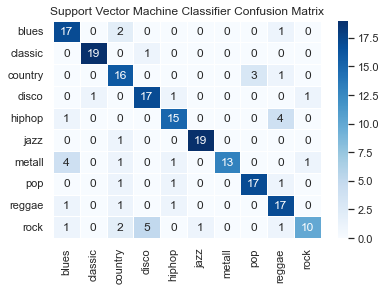

In [118]:
# Printing confusion matrix
print('True classes in rows, predictions in columns')
axes = sns.heatmap(confusion_df, annot=True, linewidths=.5, cmap='Blues')
plt.title('Support Vector Machine Classifier Confusion Matrix')
plt.show()

#### Save the final model to project model folder

In [119]:
# Saving model to file.
estimator_name = 'final_svm_clf'
model = final_svm_clf
name = experiment_id + estimator_name + '.pkl'
filename = os.path.join(MODELS_PATH,name)
pickle.dump(model, open(filename, 'wb'))
print(f'Model {estimator_name} saved to file {name} in model folder.')

Model final_svm_clf saved to file exp01_final_svm_clf.pkl in model folder.


<a href = '#Introduction'>Back to Introduction</a>


## 6. Independencies


In [120]:
%load_ext watermark
%watermark -v -n -m -p matplotlib,numpy,scipy,sklearn,pandas,seaborn

Python implementation: CPython
Python version       : 3.8.12
IPython version      : 7.29.0

matplotlib: 3.5.0
numpy     : 1.20.3
scipy     : 1.7.1
sklearn   : 1.0.1
pandas    : 1.3.4
seaborn   : 0.11.2

Compiler    : MSC v.1916 64 bit (AMD64)
OS          : Windows
Release     : 10
Machine     : AMD64
Processor   : Intel64 Family 6 Model 126 Stepping 5, GenuineIntel
CPU cores   : 8
Architecture: 64bit




## 7. References

(1) Information on GTZAN dataset is available on http://martyas.info/downloads/datasets.html  

(2) Andrada Oteanu, James Wiltshire, Lauren O'Hare and Minyu Lei, GTZAN feature data csv -files available from https://www.kaggle.com/andradaolteanu/gtzan-dataset-music-genre-classification  

(3) Géron A. Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow, 2nd Edition. O’Reilly Media, Inc; 2019.  

(4) Brian McFee, Alexandros Metsai, Matt McVicar, Stefan Balke, Carl Thomé, Colin Raffel, et al. librosa/librosa: 0.8.1rc2. Zenodo; 2021.  

(5) Scikit-learn documentation https://scikit-learn.org/stable/index.html  

(6) Pandas documentation https://pandas.pydata.org/docs/  

(7) Seaborn documentation https://seaborn.pydata.org/  

(8) NumPy documentation https://numpy.org/doc/stable/

(9) Markdown documentation https://www.markdownguide.org/  

(10) Jupyter documentation https://jupyter.org/index.html  


In [121]:
# Total time taken to run this notebook from beginning to end
end0 = time.time()
print(f'total time elapsed on running this notebook from beginning to end is {(end0-start0) / 60} minuuttia')

total time elapsed on running this notebook from beginning to end is 16.27465263605118 minuuttia
